# Preparing the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = 'https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_csv_latest.zip'

!wget "https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_csv_latest.zip" -O dataset.zip


--2025-04-08 02:22:17--  https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_csv_latest.zip
Resolving synthetichealth.github.io (synthetichealth.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to synthetichealth.github.io (synthetichealth.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7991968 (7.6M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   7.62M  32.7MB/s    in 0.2s    

2025-04-08 02:22:17 (32.7 MB/s) - ‘dataset.zip’ saved [7991968/7991968]



In [3]:
import zipfile
import os

zip_path = "dataset.zip"
extract_path = "extracted_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)


['payers.csv',
 'devices.csv',
 'procedures.csv',
 'claims.csv',
 'organizations.csv',
 'encounters.csv',
 'immunizations.csv',
 'medications.csv',
 'careplans.csv',
 'patients.csv',
 'providers.csv',
 'observations.csv',
 'supplies.csv',
 'payer_transitions.csv',
 'conditions.csv',
 'claims_transactions.csv',
 'allergies.csv',
 'imaging_studies.csv']

In [4]:
csv_files = [file for file in os.listdir(extract_path) if file.endswith(".csv")]

dataframes = {file: pd.read_csv(os.path.join(extract_path, file)) for file in csv_files}

for filename, df in dataframes.items():
    print(f" FILE {filename} - SHAPE: {df.shape}")
    display(df.head(3))  # Show first 3 rows


 FILE payers.csv - SHAPE: (10, 22)


,Id,NAME,OWNERSHIP,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE,AMOUNT_COVERED,AMOUNT_UNCOVERED,...,UNCOVERED_ENCOUNTERS,COVERED_MEDICATIONS,UNCOVERED_MEDICATIONS,COVERED_PROCEDURES,UNCOVERED_PROCEDURES,COVERED_IMMUNIZATIONS,UNCOVERED_IMMUNIZATIONS,UNIQUE_CUSTOMERS,QOLS_AVG,MEMBER_MONTHS
0,a735bf55-83e9-331a-899d-a82a60b9f60c,Medicare,GOVERNMENT,NaN,NaN,NaN,NaN,NaN,7816873.41,388769.54,...,0,3742,0,9155,0,546,0,30,0.692503,5532
1,df166300-5a78-3502-a46a-832842197811,Medicaid,GOVERNMENT,NaN,NaN,NaN,NaN,NaN,8673985.13,192216.37,...,0,891,0,4990,0,886,0,44,0.939526,7092
2,d18ef2e6-ef40-324c-be54-34a5ee865625,Dual Eligible,GOVERNMENT,NaN,NaN,NaN,NaN,NaN,581647.09,7344.74,...,0,67,0,527,0,72,0,5,0.513418,864


 FILE devices.csv - SHAPE: (676, 7)


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,UDI
0,2015-09-28T09:04:48Z,2015-10-31T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,228869008,Manual wheelchair (physical object),(01)74035126130039(11)150907(17)400921(10)7561...
1,2015-09-28T09:04:48Z,2015-10-31T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,705417005,Wheelchair accessory (physical object),(01)74178207044942(11)150907(17)400921(10)4565...
2,1996-10-22T19:07:21Z,NaN,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,cc632c61-54a0-35f6-be9f-879875d14c4f,337414009,Blood glucose meter (physical object),(01)32229498379273(11)961001(17)211016(10)2817...


 FILE procedures.csv - SHAPE: (17784, 10)


,START,STOP,PATIENT,ENCOUNTER,SYSTEM,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2015-09-28T09:04:48Z,2015-09-28T09:34:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,http://snomed.info/sct,713021002,Plain X-ray of pelvis (procedure),431.4,NaN,NaN
1,2015-09-28T09:04:48Z,2015-09-28T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,http://snomed.info/sct,305428000,Admission to orthopedic department (procedure),431.4,359817006.0,Closed fracture of hip (disorder)
2,2016-04-10T09:04:48Z,2016-04-10T09:19:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,http://snomed.info/sct,430193006,Medication reconciliation (procedure),852.4,NaN,NaN


 FILE claims.csv - SHAPE: (12654, 31)


,Id,PATIENTID,PROVIDERID,PRIMARYPATIENTINSURANCEID,SECONDARYPATIENTINSURANCEID,DEPARTMENTID,PATIENTDEPARTMENTID,DIAGNOSIS1,DIAGNOSIS2,DIAGNOSIS3,...,STATUS2,STATUSP,OUTSTANDING1,OUTSTANDING2,OUTSTANDINGP,LASTBILLEDDATE1,LASTBILLEDDATE2,LASTBILLEDDATEP,HEALTHCARECLAIMTYPEID1,HEALTHCARECLAIMTYPEID2
0,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,30a6452c-4297-a1ac-977a-6a23237c7b46,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,NaN,20,20,105531004,224299000.0,266934004.0,...,CLOSED,CLOSED,0.0,0.0,0.0,2012-04-01T10:02:47Z,2012-04-01T10:02:47Z,2012-04-01T10:02:47Z,1,1
1,f1eb9d4d-4370-3739-1321-80287b11d1e9,30a6452c-4297-a1ac-977a-6a23237c7b46,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,NaN,20,20,314529007,160903007.0,713458007.0,...,CLOSED,CLOSED,0.0,0.0,0.0,2013-04-07T09:55:49Z,2013-04-07T09:55:49Z,2013-04-07T09:55:49Z,1,1
2,8052e96e-df67-3cc4-21cf-cfc9fc909a4a,30a6452c-4297-a1ac-977a-6a23237c7b46,2c4b7d17-0ded-3e16-b5eb-6dda1d6a81bb,d31fccc3-1767-390d-966a-22a5156f4219,NaN,4,4,125605004,125605004.0,359817006.0,...,CLOSED,CLOSED,0.0,0.0,0.0,2015-09-28T11:02:48Z,2015-09-28T11:02:48Z,2015-09-28T11:02:48Z,2,2


 FILE organizations.csv - SHAPE: (272, 11)


,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON,PHONE,REVENUE,UTILIZATION
0,74ab949d-17ac-3309-83a0-13b4405c66aa,Fitchburg Outpatient Clinic,881 Main Street,Fitchburg,MA,1420,42.586487,-71.805210,978-342-9781 Or 978-342-9781,0.0,66
1,faffaf6a-ee1a-3673-b0b0-421a9c249244,ACTIVATED BY WELLNESS LLC,66 WASHINGTON ST,STOUGHTON,MA,20722571,42.144158,-71.103783,6178719807,0.0,34
2,17a4bae5-8b64-34d7-8144-b428be027bd0,NURSE ON CALL,512 MAIN STREET SUITE 211,SHREWSBURY,MA,15456406,42.295110,-71.718085,5088451232,0.0,5


 FILE encounters.csv - SHAPE: (7049, 15)


,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,294d0dab-907e-8fce-7a47-0c0d322a5734,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.80,1567.00,87.2,NaN,NaN
1,2ccec874-cbaa-e280-7abb-f2bc2b603961,2013-04-07T09:04:48Z,2013-04-07T09:55:49Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.80,704.20,0.0,NaN,NaN
2,953c5138-ce17-4084-3432-1ac23f184528,2015-09-28T09:04:48Z,2015-09-28T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,db106514-f254-3402-b6a4-6d210c78c7e2,2c4b7d17-0ded-3e16-b5eb-6dda1d6a81bb,d31fccc3-1767-390d-966a-22a5156f4219,emergency,50849002,Emergency room admission (procedure),146.18,1008.98,0.0,125605004.0,Fracture of bone (disorder)


 FILE immunizations.csv - SHAPE: (1619, 6)


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
0,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,140,Influenza seasonal injectable preservative ...,136.0
1,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,113,Td (adult) 5 Lf tetanus toxoid preservative ...,136.0
2,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,43,Hep B adult,136.0


 FILE medications.csv - SHAPE: (5605, 13)


,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2015-09-28T11:02:48Z,2015-10-15T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,d31fccc3-1767-390d-966a-22a5156f4219,953c5138-ce17-4084-3432-1ac23f184528,857005,Acetaminophen 325 MG / HYDROcodone Bitartrate ...,2.51,0.0,1,2.51,NaN,NaN
1,2015-09-28T11:02:48Z,2015-10-31T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,d31fccc3-1767-390d-966a-22a5156f4219,953c5138-ce17-4084-3432-1ac23f184528,310965,Ibuprofen 200 MG Oral Tablet,365.90,0.0,1,365.90,NaN,NaN
2,2005-11-08T20:24:07Z,NaN,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,e03e23c9-4df1-3eb6-a62d-f70f02301496,d1cea2e5-1735-089f-c72f-22ad16976663,310325,ferrous sulfate 325 MG Oral Tablet,0.15,0.0,50,7.50,NaN,NaN


 FILE careplans.csv - SHAPE: (329, 9)


,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,47441dae-e581-6d99-e5fc-b7fbd9cde7fe,2015-09-28,2015-10-31,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,385691007,Fracture care (regime/therapy),359817006.0,Closed fracture of hip (disorder)
1,131c18a3-d324-663f-2f4a-d3ff0f6c26d6,1996-10-22,NaN,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,cc632c61-54a0-35f6-be9f-879875d14c4f,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
2,21ffb15e-179c-d330-70f0-0ebc59b1cdb9,2020-10-30,2020-11-20,30a6452c-4297-a1ac-977a-6a23237c7b46,794baa15-fe5e-c061-e188-ad59022aeea5,773513001,Physiotherapy care plan (record artifact),44465007.0,Sprain of ankle (disorder)


 FILE patients.csv - SHAPE: (106, 28)


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,30a6452c-4297-a1ac-977a-6a23237c7b46,1994-02-06,NaN,999-52-8591,S99996852,X47758697X,Mr.,Joshua658,Alvin56,Kunde533,...,Braintree,Massachusetts,Norfolk County,25021.0,2184,42.211142,-71.045802,56904.96,18019.99,100511
1,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,1968-08-06,2009-12-11,999-75-3953,S99993577,X28173268X,Mr.,Bennie663,NaN,Ebert178,...,Braintree,Massachusetts,Norfolk County,25021.0,2184,42.255420,-70.971016,124024.12,1075.06,49737
2,7179458e-d6e3-c723-2530-d4acfe1c2668,2008-12-21,NaN,999-70-1925,NaN,NaN,NaN,Hunter736,Mckinley734,Gerlach374,...,Mattapoisett,Massachusetts,Plymouth County,NaN,0,41.648292,-70.850619,45645.06,6154.94,133816


 FILE providers.csv - SHAPE: (272, 13)


,Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,LAT,LON,ENCOUNTERS,PROCEDURES
0,22d80c8d-fb8f-322d-9753-22002b043474,74ab949d-17ac-3309-83a0-13b4405c66aa,Ted955 Reilly981,M,GENERAL PRACTICE,881 Main Street,Fitchburg,MA,1420,42.586487,-71.805210,66,0
1,76781d9f-6cd0-30f2-81b3-359fad974235,faffaf6a-ee1a-3673-b0b0-421a9c249244,Gustavo235 Armstrong51,M,GENERAL PRACTICE,66 WASHINGTON ST,STOUGHTON,MA,20722571,42.144158,-71.103783,34,0
2,5fca6a38-55af-324f-835b-0eb5837afc1c,17a4bae5-8b64-34d7-8144-b428be027bd0,Isabela97 Solorio55,F,GENERAL PRACTICE,512 MAIN STREET SUITE 211,SHREWSBURY,MA,15456406,42.295110,-71.718085,5,0


 FILE observations.csv - SHAPE: (86360, 9)


,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,vital-signs,8302-2,Body Height,176.1,cm,numeric
1,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,vital-signs,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.0,{score},numeric
2,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,vital-signs,29463-7,Body Weight,86.4,kg,numeric


 FILE supplies.csv - SHAPE: (2688, 6)


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,QUANTITY
0,2016-04-24,30a6452c-4297-a1ac-977a-6a23237c7b46,1617912a-d228-1f6c-ed9b-d8fb39ef0a32,277183007,Dental equipment (physical object),1
1,1996-10-22,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,cc632c61-54a0-35f6-be9f-879875d14c4f,337388004,Blood glucose testing strips (physical object),50
2,1999-10-26,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,dd83e406-eae2-49dc-734e-06d34594f3df,337388004,Blood glucose testing strips (physical object),50


 FILE payer_transitions.csv - SHAPE: (1145, 8)


,PATIENT,MEMBERID,START_DATE,END_DATE,PAYER,SECONDARY_PAYER,PLAN_OWNERSHIP,OWNER_NAME
0,30a6452c-4297-a1ac-977a-6a23237c7b46,8c03da34-561e-4f25-6fe1-404bcbbd2d37,2013-02-10T09:04:48Z,2014-02-09T09:04:48Z,d31fccc3-1767-390d-966a-22a5156f4219,NaN,Self,Joshua658 Kunde533
1,30a6452c-4297-a1ac-977a-6a23237c7b46,fcd3c5f5-229b-f6da-f9b1-57e9ccdd4227,2014-02-09T09:04:48Z,2015-02-08T09:04:48Z,d31fccc3-1767-390d-966a-22a5156f4219,NaN,Self,Joshua658 Kunde533
2,30a6452c-4297-a1ac-977a-6a23237c7b46,e7478da0-add2-e9ab-5fa7-5404bb14a93d,2015-02-08T09:04:48Z,2016-02-07T09:04:48Z,d31fccc3-1767-390d-966a-22a5156f4219,NaN,Self,Joshua658 Kunde533


 FILE conditions.csv - SHAPE: (3876, 7)


,START,STOP,PATIENT,ENCOUNTER,SYSTEM,CODE,DESCRIPTION
0,2012-04-01,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,294d0dab-907e-8fce-7a47-0c0d322a5734,http://snomed.info/sct,105531004,Housing unsatisfactory (finding)
1,2012-04-01,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,294d0dab-907e-8fce-7a47-0c0d322a5734,http://snomed.info/sct,224299000,Received higher education (finding)
2,2012-04-01,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,294d0dab-907e-8fce-7a47-0c0d322a5734,http://snomed.info/sct,266934004,Transport problem (finding)


 FILE claims_transactions.csv - SHAPE: (111602, 33)


,ID,CLAIMID,CHARGEID,PATIENTID,TYPE,AMOUNT,METHOD,FROMDATE,TODATE,PLACEOFSERVICE,...,PAYMENTS,ADJUSTMENTS,TRANSFERS,OUTSTANDING,APPOINTMENTID,LINENOTE,PATIENTINSURANCEID,FEESCHEDULEID,PROVIDERID,SUPERVISINGPROVIDERID
0,ea4e815f-ce9f-2abc-6dc8-b65d49d90abf,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,0,30a6452c-4297-a1ac-977a-6a23237c7b46,CHARGE,136.8,NaN,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,f2068cee-c75c-321d-9b2c-c33535db89c9,...,0.0,0.0,NaN,0.0,294d0dab-907e-8fce-7a47-0c0d322a5734,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,1,c3d07214-c20f-3f33-ad41-0e55adf5b024,c3d07214-c20f-3f33-ad41-0e55adf5b024
1,d49d02bf-9d41-5579-db91-6cba93b5157e,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,1,30a6452c-4297-a1ac-977a-6a23237c7b46,TRANSFEROUT,NaN,NaN,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,f2068cee-c75c-321d-9b2c-c33535db89c9,...,0.0,0.0,136.8,136.8,294d0dab-907e-8fce-7a47-0c0d322a5734,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,1,c3d07214-c20f-3f33-ad41-0e55adf5b024,c3d07214-c20f-3f33-ad41-0e55adf5b024
2,a93a057f-3a85-aaf3-b722-d975276d2afd,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,2,30a6452c-4297-a1ac-977a-6a23237c7b46,TRANSFERIN,136.8,NaN,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,f2068cee-c75c-321d-9b2c-c33535db89c9,...,0.0,0.0,136.8,136.8,294d0dab-907e-8fce-7a47-0c0d322a5734,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,1,c3d07214-c20f-3f33-ad41-0e55adf5b024,c3d07214-c20f-3f33-ad41-0e55adf5b024


 FILE allergies.csv - SHAPE: (92, 15)


,START,STOP,PATIENT,ENCOUNTER,CODE,SYSTEM,DESCRIPTION,TYPE,CATEGORY,REACTION1,DESCRIPTION1,SEVERITY1,REACTION2,DESCRIPTION2,SEVERITY2
0,2014-07-26,NaN,4569671e-ed39-055f-8e78-422b96c9896b,f5242c34-8841-269a-50c5-c6f623575955,419199007,SNOMED-CT,Allergy to substance (finding),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-07-26,NaN,4569671e-ed39-055f-8e78-422b96c9896b,f5242c34-8841-269a-50c5-c6f623575955,84489001,SNOMED-CT,Mold (organism),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-07-26,NaN,4569671e-ed39-055f-8e78-422b96c9896b,f5242c34-8841-269a-50c5-c6f623575955,264287008,SNOMED-CT,Animal dander (substance),allergy,environment,878820003.0,Rhinoconjunctivitis (disorder),MODERATE,247472004.0,Wheal (finding),MILD


 FILE imaging_studies.csv - SHAPE: (407, 13)


,Id,DATE,PATIENT,ENCOUNTER,SERIES_UID,BODYSITE_CODE,BODYSITE_DESCRIPTION,MODALITY_CODE,MODALITY_DESCRIPTION,INSTANCE_UID,SOP_CODE,SOP_DESCRIPTION,PROCEDURE_CODE
0,75c55607-6b95-b44b-f5a1-d3bf5432c23a,2015-09-28T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,1.2.840.99999999.1.89211462.1443431088265,12921003,Structure of pelvis (body structure),DX,Digital Radiography,1.2.840.99999999.1.1.43566029.1443431088265,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage,713021002
1,5e3b667c-2d48-0401-0434-34fd3e7cc267,2016-04-24T10:56:49Z,30a6452c-4297-a1ac-977a-6a23237c7b46,1617912a-d228-1f6c-ed9b-d8fb39ef0a32,1.2.840.99999999.1.95156023.1461495409265,700016008,Structure of region of internal part of mouth ...,DX,Digital Radiography,1.2.840.99999999.1.1.67878918.1461495409265,1.2.840.10008.5.1.4.1.1.1.3,Digital Intra-Oral X-Ray Image Storage - For P...,241046008
2,ddaaa2df-5e1c-0ccf-cd2d-3215281e14ce,2015-09-14T18:02:09Z,7179458e-d6e3-c723-2530-d4acfe1c2668,ed8fc369-fd6a-5249-187c-690e5c4524ed,1.2.840.99999999.1.99948491.1442253729798,91609006,Bone structure of mandible (body structure),DX,Digital Radiography,1.2.840.99999999.1.1.83142373.1442253729798,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage,19589009


## Data PreProcessing

## Joining Tables

In [5]:
# loading the CSVs
patients = dataframes['patients.csv']
encounters = dataframes['encounters.csv']
conditions = dataframes['conditions.csv']
procedures = dataframes['procedures.csv']
medications = dataframes['medications.csv']
claims = dataframes['claims.csv']
observations = dataframes['observations.csv']

# rename columns to avoid conflicts before merging
patients = patients.rename(columns=lambda x: f"PATIENT_{x}" if x != "Id" else "PATIENT_ID")
encounters = encounters.rename(columns=lambda x: f"ENCOUNTER_{x}" if x != "Id" else "ENCOUNTER_ID")
conditions = conditions.rename(columns=lambda x: f"CONDITION_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")
procedures = procedures.rename(columns=lambda x: f"PROCEDURE_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")
medications = medications.rename(columns=lambda x: f"MEDICATION_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")
claims = claims.rename(columns=lambda x: f"CLAIM_{x}" if x != "PATIENTID" else "PATIENT_ID")
observations = observations.rename(columns=lambda x: f"OBSERVATION_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")

# merge Encounters with Patients
df = encounters.merge(patients, left_on='ENCOUNTER_PATIENT', right_on='PATIENT_ID', how='left')

# merge Conditions
df = df.merge(conditions, on='ENCOUNTER_ID', how='left')

# merge Procedures
df = df.merge(procedures, on='ENCOUNTER_ID', how='left')

# merge Medications
df = df.merge(medications, on='ENCOUNTER_ID', how='left')

# merge Observations
df = df.merge(observations, on='ENCOUNTER_ID', how='left')

# drop redundant ID cols
df.drop(columns=['PATIENT_ID', 'ENCOUNTER_ID'], errors='ignore', inplace=True)

print("Shape:", df.shape)
df.head()


Shape: (3887768, 76)


,ENCOUNTER_START,ENCOUNTER_STOP,ENCOUNTER_PATIENT,ENCOUNTER_ORGANIZATION,ENCOUNTER_PROVIDER,ENCOUNTER_PAYER,ENCOUNTER_ENCOUNTERCLASS,ENCOUNTER_CODE,ENCOUNTER_DESCRIPTION,ENCOUNTER_BASE_ENCOUNTER_COST,...,MEDICATION_REASONCODE,MEDICATION_REASONDESCRIPTION,OBSERVATION_DATE,OBSERVATION_PATIENT,OBSERVATION_CATEGORY,OBSERVATION_CODE,OBSERVATION_DESCRIPTION,OBSERVATION_VALUE,OBSERVATION_UNITS,OBSERVATION_TYPE
0,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['ENCOUNTER_START', 'ENCOUNTER_STOP', 'ENCOUNTER_PATIENT',
       'ENCOUNTER_ORGANIZATION', 'ENCOUNTER_PROVIDER', 'ENCOUNTER_PAYER',
       'ENCOUNTER_ENCOUNTERCLASS', 'ENCOUNTER_CODE', 'ENCOUNTER_DESCRIPTION',
       'ENCOUNTER_BASE_ENCOUNTER_COST', 'ENCOUNTER_TOTAL_CLAIM_COST',
       'ENCOUNTER_PAYER_COVERAGE', 'ENCOUNTER_REASONCODE',
       'ENCOUNTER_REASONDESCRIPTION', 'PATIENT_BIRTHDATE', 'PATIENT_DEATHDATE',
       'PATIENT_SSN', 'PATIENT_DRIVERS', 'PATIENT_PASSPORT', 'PATIENT_PREFIX',
       'PATIENT_FIRST', 'PATIENT_MIDDLE', 'PATIENT_LAST', 'PATIENT_SUFFIX',
       'PATIENT_MAIDEN', 'PATIENT_MARITAL', 'PATIENT_RACE',
       'PATIENT_ETHNICITY', 'PATIENT_GENDER', 'PATIENT_BIRTHPLACE',
       'PATIENT_ADDRESS', 'PATIENT_CITY', 'PATIENT_STATE', 'PATIENT_COUNTY',
       'PATIENT_FIPS', 'PATIENT_ZIP', 'PATIENT_LAT', 'PATIENT_LON',
       'PATIENT_HEALTHCARE_EXPENSES', 'PATIENT_HEALTHCARE_COVERAGE',
       'PATIENT_INCOME', 'CONDITION_START', 'CONDITION_STOP',
       'CONDITI

## Reducing dataframe

In [7]:
# initial drop just by looking at the columns

drop_cols = [
    'PATIENT_LAT', 'PATIENT_LON', 'PATIENT_DRIVERS', 'PATIENT_PASSPORT',
    'PATIENT_FIRST', 'PATIENT_MIDDLE', 'PATIENT_LAST', 'PATIENT_SUFFIX', 'PATIENT_MAIDEN',
    'ENCOUNTER_ORGANIZATION', 'ENCOUNTER_PROVIDER', 'ENCOUNTER_PAYER', 'MEDICATION_PAYER',
    'PATIENT_FIPS', 'PATIENT_ZIP', 'PATIENT_DEATHDATE'
]

df.drop(columns=drop_cols, inplace=True)
print("Shape:", df.shape)


Shape: (3887768, 60)


In [8]:
# which columns have the most null values

null_counts = df.isnull().sum()

null_counts_sorted = null_counts.sort_values(ascending=False)

print(null_counts_sorted)


ENCOUNTER_REASONCODE             2258582
ENCOUNTER_REASONDESCRIPTION      2258582
MEDICATION_REASONCODE            2215176
MEDICATION_REASONDESCRIPTION     2215176
PROCEDURE_REASONCODE             2147635
PROCEDURE_REASONDESCRIPTION      2147635
OBSERVATION_UNITS                 763563
CONDITION_STOP                    421622
CONDITION_SYSTEM                  223854
CONDITION_PATIENT                 223854
CONDITION_CODE                    223854
CONDITION_START                   223854
CONDITION_DESCRIPTION             223854
MEDICATION_STOP                   208918
MEDICATION_START                  152358
MEDICATION_BASE_COST              152358
MEDICATION_PAYER_COVERAGE         152358
MEDICATION_PATIENT                152358
MEDICATION_TOTALCOST              152358
MEDICATION_CODE                   152358
MEDICATION_DESCRIPTION            152358
MEDICATION_DISPENSES              152358
PATIENT_MARITAL                    70899
PROCEDURE_PATIENT                  21161
PROCEDURE_CODE  

In [9]:
# to datetime
date_cols = [
    'ENCOUNTER_START', 'ENCOUNTER_STOP', 'PATIENT_BIRTHDATE',
    'CONDITION_START', 'CONDITION_STOP', 'PROCEDURE_START',
    'PROCEDURE_STOP', 'MEDICATION_START', 'MEDICATION_STOP',
    'OBSERVATION_DATE'
]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# to category
category_cols = [
    'ENCOUNTER_PATIENT', 'CONDITION_PATIENT', 'PROCEDURE_PATIENT',
    'MEDICATION_PATIENT', 'OBSERVATION_PATIENT', 'ENCOUNTER_ENCOUNTERCLASS',
    'ENCOUNTER_DESCRIPTION', 'ENCOUNTER_REASONDESCRIPTION', 'PATIENT_PREFIX',
    'PATIENT_MARITAL', 'PATIENT_RACE', 'PATIENT_ETHNICITY', 'PATIENT_GENDER',
    'PATIENT_BIRTHPLACE', 'PATIENT_CITY', 'PATIENT_STATE', 'PATIENT_COUNTY',
    'CONDITION_SYSTEM', 'CONDITION_DESCRIPTION', 'PROCEDURE_SYSTEM',
    'PROCEDURE_DESCRIPTION', 'PROCEDURE_REASONDESCRIPTION',
    'MEDICATION_DESCRIPTION', 'MEDICATION_REASONDESCRIPTION',
    'OBSERVATION_CATEGORY', 'OBSERVATION_DESCRIPTION',
    'OBSERVATION_UNITS', 'OBSERVATION_TYPE'
]
for col in category_cols:
    df[col] = df[col].astype('category')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 60 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   ENCOUNTER_START                datetime64[ns, UTC]
 1   ENCOUNTER_STOP                 datetime64[ns, UTC]
 2   ENCOUNTER_PATIENT              category           
 3   ENCOUNTER_ENCOUNTERCLASS       category           
 4   ENCOUNTER_CODE                 int64              
 5   ENCOUNTER_DESCRIPTION          category           
 6   ENCOUNTER_BASE_ENCOUNTER_COST  float64            
 7   ENCOUNTER_TOTAL_CLAIM_COST     float64            
 8   ENCOUNTER_PAYER_COVERAGE       float64            
 9   ENCOUNTER_REASONCODE           float64            
 10  ENCOUNTER_REASONDESCRIPTION    category           
 11  PATIENT_BIRTHDATE              datetime64[ns]     
 12  PATIENT_SSN                    object             
 13  PATIENT_PREFIX                 category   

In [11]:
df['OBSERVATION_CODE'] = df['OBSERVATION_CODE'].astype(str).str.replace('-', '')

In [12]:
df['OBSERVATION_CODE'].unique()

array(['nan', '83022', '725143', '294637', '391565', '84624', '84806',
       '88674', '92791', '66902', '7898', '7187', '45443', '7872', '7856',
       '7864', '210005', '7773', '322073', '326231', '721662', '765016',
       '930263', '930271', '930289', '930388', '930297', '930305',
       '930313', '635862', '764373', '678755', '825893', '567990',
       '930339', '718023', '635128', '548990', '930347', '930354',
       '326249', '560516', '702746', '765040', '557587', '826677',
       '83105', '45484', '23390', '62992', '384834', '497651', '29470',
       '62984', '20693', '205658', '20933', '25718', '182626', '20859',
       '756262', '205708', '694539', '595769', '892042', '756361',
       '27086', '57927', '25148', '58115', '58032', '58040', '58024',
       '57943', '57992', '58214', '139451', '57877', '241240', '82479',
       '57695', '6304', '776062', '82891', '98434', '337568', '579052',
       '921429', '921411', '921312', '921403', '921395', '921387',
       '921304', '921

In [13]:
df.replace('nan', np.nan, inplace=True)

In [14]:
df['OBSERVATION_CODE'] = pd.to_numeric(df['OBSERVATION_CODE'], errors='coerce')

In [15]:
df['OBSERVATION_VALUE'] = pd.to_numeric(df['OBSERVATION_VALUE'], errors='coerce')

In [16]:
df.drop(columns=['PATIENT_ADDRESS'], inplace=True)

In [17]:
df['PATIENT_SSN'] = df['PATIENT_SSN'].astype(str).str.replace('-', '')
df['PATIENT_SSN'] = pd.to_numeric(df['PATIENT_SSN'], errors = 'coerce')

In [18]:
df['PATIENT_SSN'].nunique()

106

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 59 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   ENCOUNTER_START                datetime64[ns, UTC]
 1   ENCOUNTER_STOP                 datetime64[ns, UTC]
 2   ENCOUNTER_PATIENT              category           
 3   ENCOUNTER_ENCOUNTERCLASS       category           
 4   ENCOUNTER_CODE                 int64              
 5   ENCOUNTER_DESCRIPTION          category           
 6   ENCOUNTER_BASE_ENCOUNTER_COST  float64            
 7   ENCOUNTER_TOTAL_CLAIM_COST     float64            
 8   ENCOUNTER_PAYER_COVERAGE       float64            
 9   ENCOUNTER_REASONCODE           float64            
 10  ENCOUNTER_REASONDESCRIPTION    category           
 11  PATIENT_BIRTHDATE              datetime64[ns]     
 12  PATIENT_SSN                    int64              
 13  PATIENT_PREFIX                 category   

In [20]:
df.shape

(3887768, 59)

## Nulls

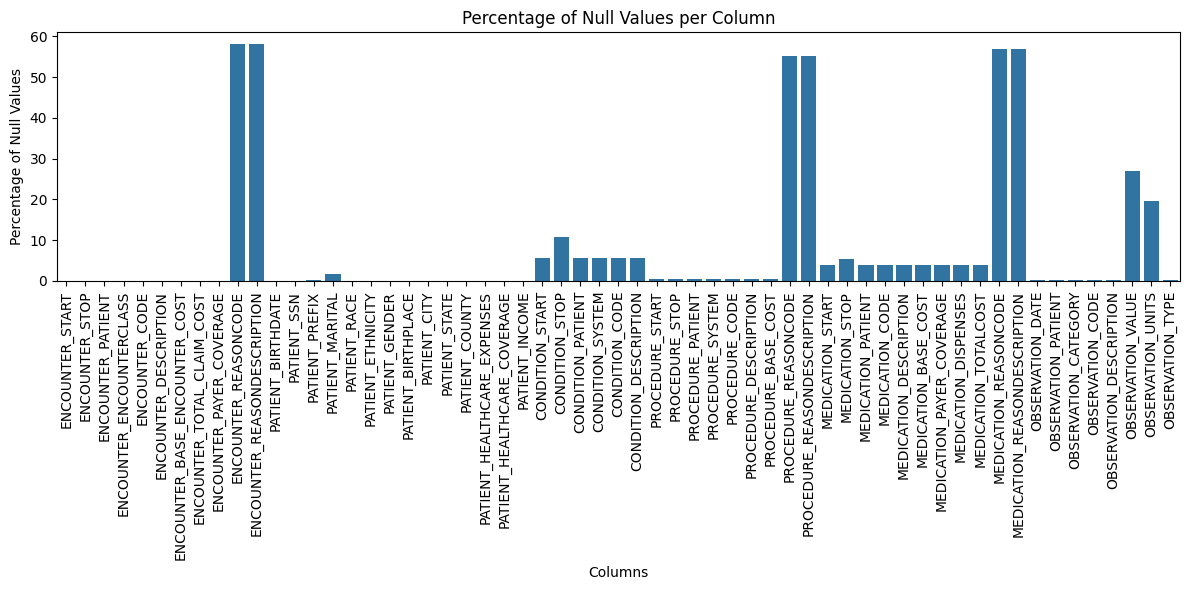

In [21]:
null_percentages = df.isnull().sum() / len(df) * 100

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentages.index, y=null_percentages.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values per Column")
plt.tight_layout()
plt.show()


In [22]:
# LOS
df['LENGTH_OF_STAY'] = (df['ENCOUNTER_STOP'] - df['ENCOUNTER_START']).dt.days

# fill missing cost values with median
cost_cols = ['ENCOUNTER_BASE_ENCOUNTER_COST', 'ENCOUNTER_TOTAL_CLAIM_COST']
df[cost_cols] = df[cost_cols].fillna(df[cost_cols].median())

# fill encounter missing values with mode
df['ENCOUNTER_ENCOUNTERCLASS'].fillna(df['ENCOUNTER_ENCOUNTERCLASS'].mode()[0], inplace=True)


<ipython-input-22-da61318f01ae>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ENCOUNTER_ENCOUNTERCLASS'].fillna(df['ENCOUNTER_ENCOUNTERCLASS'].mode()[0], inplace=True)


In [23]:
# fill demographic missing values with "UNKNOWN"
demo_cols = ['PATIENT_GENDER', 'PATIENT_RACE', 'PATIENT_ETHNICITY']
for col in demo_cols:
    # add 'UNKNOWN' as a new category
    if 'UNKNOWN' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories(['UNKNOWN'])
    df[col] = df[col].fillna('UNKNOWN')

In [24]:
# fill missing condition codes and descriptions with "UNKNOWN"

if 'UNKNOWN' not in df['CONDITION_DESCRIPTION'].cat.categories:
    df['CONDITION_DESCRIPTION'] = df['CONDITION_DESCRIPTION'].cat.add_categories(['UNKNOWN'])
df['CONDITION_DESCRIPTION'].fillna('UNKNOWN', inplace=True)
df['CONDITION_CODE'].fillna(-1, inplace=True)

<ipython-input-24-58be6f5a4519>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CONDITION_DESCRIPTION'].fillna('UNKNOWN', inplace=True)
<ipython-input-24-58be6f5a4519>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [25]:
# fill missing medication and procedure details
df['MEDICATION_CODE'].fillna(-1, inplace=True)
df['PROCEDURE_CODE'].fillna(-1, inplace=True)
df['OBSERVATION_VALUE'].fillna(df['OBSERVATION_VALUE'].median(), inplace=True)

if 'UNKNOWN' not in df['OBSERVATION_CATEGORY'].cat.categories:
    df['OBSERVATION_CATEGORY'] = df['OBSERVATION_CATEGORY'].cat.add_categories(['UNKNOWN'])

df['OBSERVATION_CATEGORY'].fillna('UNKNOWN', inplace=True)

<ipython-input-25-b8f8d6213b12>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MEDICATION_CODE'].fillna(-1, inplace=True)
<ipython-input-25-b8f8d6213b12>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [26]:
drop_cols = ['OBSERVATION_TYPE', 'OBSERVATION_UNITS', 'OBSERVATION_CODE',
             'PATIENT_PREFIX', 'PATIENT_BIRTHPLACE']
df.drop(columns=drop_cols, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 55 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   ENCOUNTER_START                datetime64[ns, UTC]
 1   ENCOUNTER_STOP                 datetime64[ns, UTC]
 2   ENCOUNTER_PATIENT              category           
 3   ENCOUNTER_ENCOUNTERCLASS       category           
 4   ENCOUNTER_CODE                 int64              
 5   ENCOUNTER_DESCRIPTION          category           
 6   ENCOUNTER_BASE_ENCOUNTER_COST  float64            
 7   ENCOUNTER_TOTAL_CLAIM_COST     float64            
 8   ENCOUNTER_PAYER_COVERAGE       float64            
 9   ENCOUNTER_REASONCODE           float64            
 10  ENCOUNTER_REASONDESCRIPTION    category           
 11  PATIENT_BIRTHDATE              datetime64[ns]     
 12  PATIENT_SSN                    int64              
 13  PATIENT_MARITAL                category   

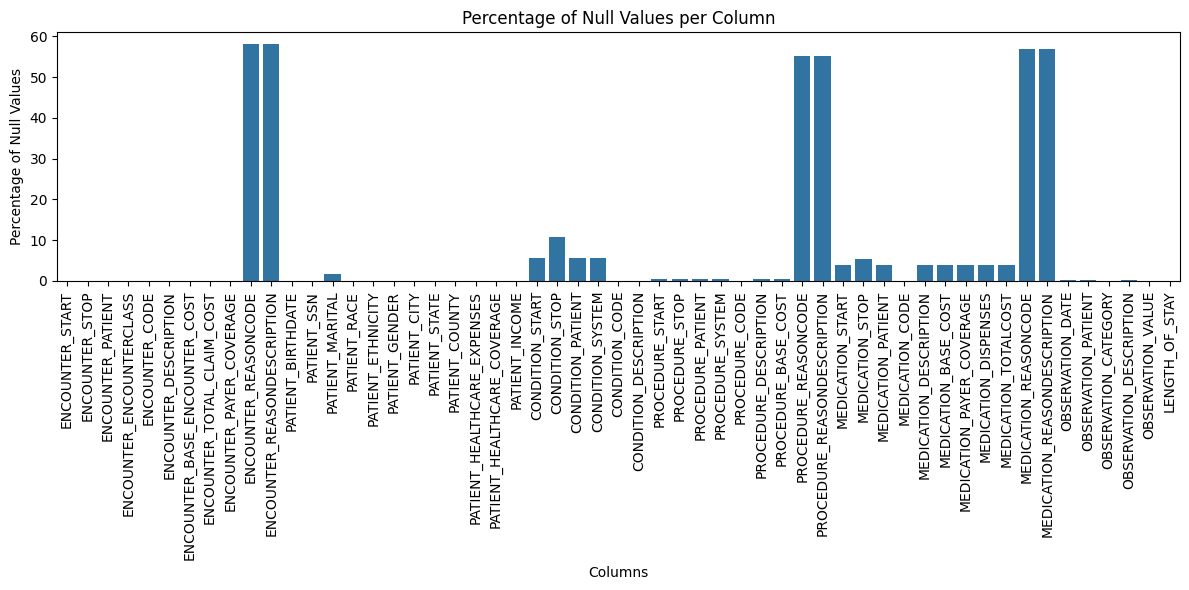

In [28]:
null_percentages = df.isnull().sum() / len(df) * 100

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentages.index, y=null_percentages.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values per Column")
plt.tight_layout()
plt.show()

# DF Creation for Modeling

### Correlations

In [29]:
df.index

RangeIndex(start=0, stop=3887768, step=1)

In [30]:
df_inpatient = df[df['ENCOUNTER_ENCOUNTERCLASS'] == 'inpatient']

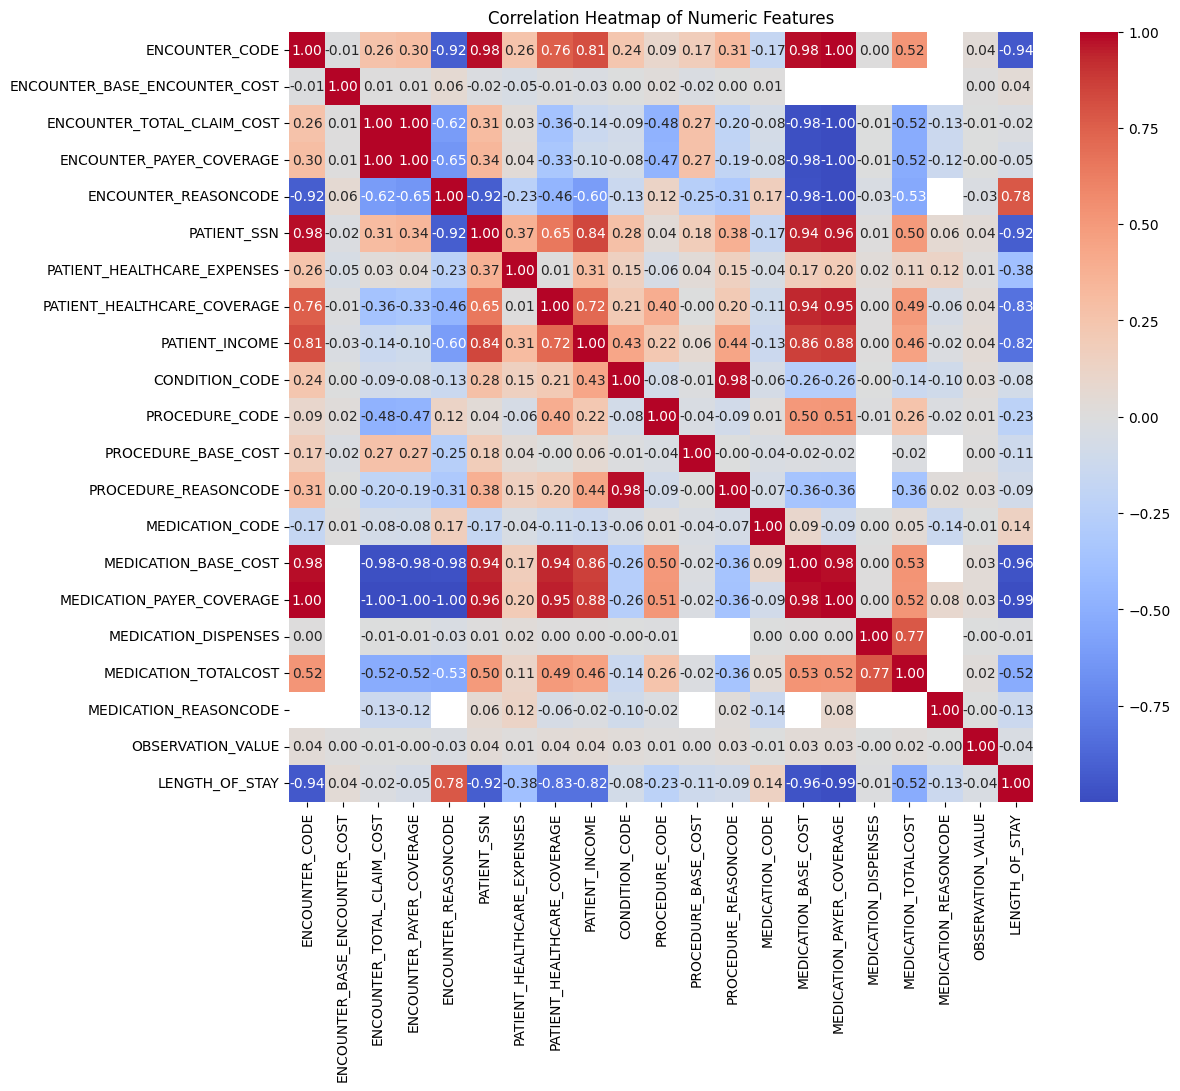

In [31]:
df_numeric = df_inpatient.select_dtypes(include=np.number)

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [32]:
correlations = correlation_matrix['LENGTH_OF_STAY'].drop('LENGTH_OF_STAY')
significant_features = []

for feature, correlation in correlations.items():
  if abs(correlation) > 0.05:
    significant_features.append((feature, correlation))

significant_features = sorted(significant_features, key=lambda x: abs(x[1]), reverse=True)
significant_features


[('MEDICATION_PAYER_COVERAGE', -0.9858463484056899),
 ('MEDICATION_BASE_COST', -0.9622511120855249),
 ('ENCOUNTER_CODE', -0.9399400244407076),
 ('PATIENT_SSN', -0.9151703234874026),
 ('PATIENT_HEALTHCARE_COVERAGE', -0.8272172899768232),
 ('PATIENT_INCOME', -0.8205018733069013),
 ('ENCOUNTER_REASONCODE', 0.7778025251815646),
 ('MEDICATION_TOTALCOST', -0.5167148711313826),
 ('PATIENT_HEALTHCARE_EXPENSES', -0.3837000290595319),
 ('PROCEDURE_CODE', -0.22565934483507213),
 ('MEDICATION_CODE', 0.14422035966146807),
 ('MEDICATION_REASONCODE', -0.12604775842003405),
 ('PROCEDURE_BASE_COST', -0.11413656967266549),
 ('PROCEDURE_REASONCODE', -0.09212123915938979),
 ('CONDITION_CODE', -0.0823537092622203),
 ('ENCOUNTER_PAYER_COVERAGE', -0.054998182972957686)]

<ipython-input-33-051b67b91f23>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inpatient['LENGTH_OF_STAY'] = df_inpatient['LENGTH_OF_STAY'].astype('category')
<ipython-input-33-051b67b91f23>:16: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
<ipython-input-33-051b67b91f23>:16: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
<ipython-input-33-051b67b91f23>:16: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
<ipython-input-33-051b67b91f23>:16: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rc

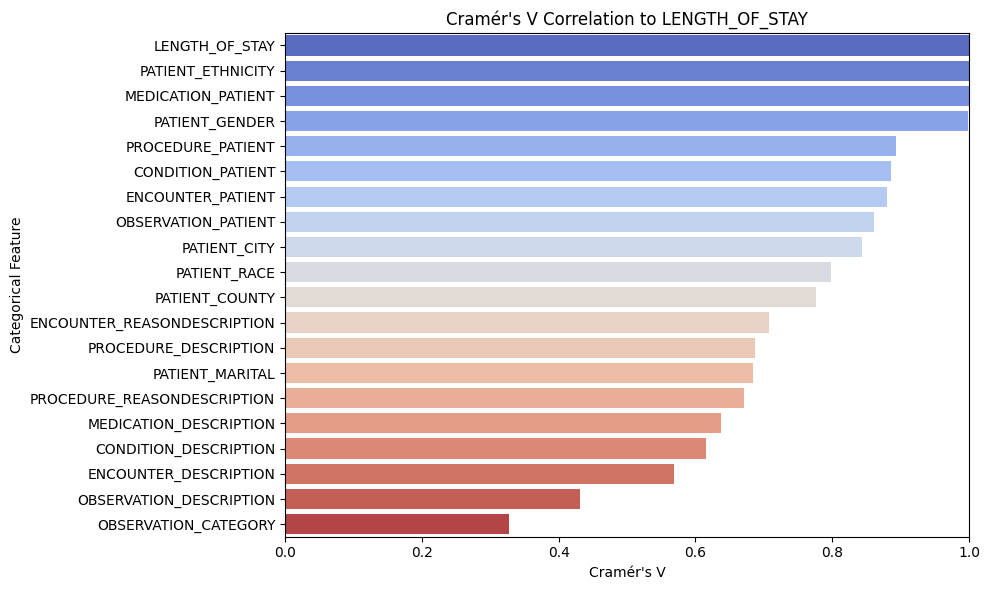

,0
LENGTH_OF_STAY,1.000000
PATIENT_ETHNICITY,0.999880
MEDICATION_PATIENT,0.999511
PATIENT_GENDER,0.999118
PROCEDURE_PATIENT,0.893798
CONDITION_PATIENT,0.886014
ENCOUNTER_PATIENT,0.879794
OBSERVATION_PATIENT,0.860659
PATIENT_CITY,0.843998
PATIENT_RACE,0.798850


In [33]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def cramers_v_vs_target(df, target_col, top_k=20):
    cat_cols = df.select_dtypes(include='category').columns
    scores = {}

    for col in cat_cols:
        try:
            score = cramers_v(df[col], df[target_col])
            scores[col] = score
        except:
            scores[col] = np.nan

    sorted_scores = pd.Series(scores).sort_values(ascending=False).head(top_k)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_scores.values, y=sorted_scores.index, palette="coolwarm")
    plt.title(f"Cramér's V Correlation to {target_col}")
    plt.xlabel("Cramér's V")
    plt.ylabel("Categorical Feature")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

    return sorted_scores

df_inpatient['LENGTH_OF_STAY'] = df_inpatient['LENGTH_OF_STAY'].astype('category')

cramers_v_vs_target(df_inpatient, 'LENGTH_OF_STAY', top_k=20)



- **ENCOUNTER_REASONCODE (0.7778)**: Indicates why the patient was admitted, which is crucial in predicting how long they will stay.  
- **PROCEDURE_PATIENT (0.8938)**: Specific procedures often indicate longer or shorter stays depending on complexity.  
- **CONDITION_PATIENT (0.8860)**: The underlying health conditions can directly affect LOS.
- **ENCOUNTER_PATIENT (0.8798)**:Possibly indicates the number of encounters or the type, which can be linked to chronic or severe conditions.  
- **MEDICATION_CODE (0.1442)**:Specific medications, especially if complex or intravenous, can increase LOS.  

- **PATIENT_ETHNICITY (0.9998)**: Could indicate socioeconomic or healthcare access differences.  
- **MEDICATION_DESCRIPTION (0.6369)**: The type of medication can indicate the severity of illness or treatment duration.  
- **PATIENT_HEALTHCARE_COVERAGE (-0.8272)**:Patients with less coverage might have shorter stays due to insurance constraints.  
- **PATIENT_INCOME (-0.8205)**:Lower income may correlate with shorter stays or less comprehensive care.  
- **MEDICATION_TOTALCOST (-0.5167)**: Higher costs could correlate with more intensive treatment or longer stays.  


In [34]:
selected_columns = ['PATIENT_SSN','LENGTH_OF_STAY','ENCOUNTER_START','ENCOUNTER_STOP',
                    'PATIENT_GENDER', 'PATIENT_RACE', 'PATIENT_ETHNICITY', 'PATIENT_INCOME',
                    'ENCOUNTER_REASONCODE','MEDICATION_CODE', 'MEDICATION_TOTALCOST']

df_los = df_inpatient[selected_columns]

print(df_los.shape)
df_los.head()


(1600390, 11)


,PATIENT_SSN,LENGTH_OF_STAY,ENCOUNTER_START,ENCOUNTER_STOP,PATIENT_GENDER,PATIENT_RACE,PATIENT_ETHNICITY,PATIENT_INCOME,ENCOUNTER_REASONCODE,MEDICATION_CODE,MEDICATION_TOTALCOST
6713,999279779,1,2019-05-27 00:22:14+00:00,2019-05-28 00:22:14+00:00,F,asian,nonhispanic,17382,183996000.0,-1.0,NaN
6714,999279779,1,2019-05-27 00:22:14+00:00,2019-05-28 00:22:14+00:00,F,asian,nonhispanic,17382,183996000.0,-1.0,NaN
7504,999974087,2,2011-01-22 17:07:21+00:00,2011-01-25 12:50:18+00:00,M,white,nonhispanic,49737,74400008.0,-1.0,NaN
54199,999458615,1,2010-05-30 00:18:09+00:00,2010-05-31 00:18:09+00:00,F,white,nonhispanic,127119,183996000.0,-1.0,NaN
57413,999347979,1,2013-07-03 14:05:28+00:00,2013-07-04 16:51:06+00:00,M,white,nonhispanic,30550,698306007.0,-1.0,NaN


In [35]:
print(df_inpatient['PATIENT_SSN'].nunique())
print(df_los['PATIENT_SSN'].nunique())

36
36


In [36]:
print(df_inpatient['LENGTH_OF_STAY'].nunique())
print(df_los['LENGTH_OF_STAY'].nunique())

10
10


# Modeling

## Preparing data for modeling

In [37]:
df_los.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600390 entries, 6713 to 3880138
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype              
---  ------                --------------    -----              
 0   PATIENT_SSN           1600390 non-null  int64              
 1   LENGTH_OF_STAY        1600390 non-null  category           
 2   ENCOUNTER_START       1600390 non-null  datetime64[ns, UTC]
 3   ENCOUNTER_STOP        1600390 non-null  datetime64[ns, UTC]
 4   PATIENT_GENDER        1600390 non-null  category           
 5   PATIENT_RACE          1600390 non-null  category           
 6   PATIENT_ETHNICITY     1600390 non-null  category           
 7   PATIENT_INCOME        1600390 non-null  int64              
 8   ENCOUNTER_REASONCODE  1600390 non-null  float64            
 9   MEDICATION_CODE       1600390 non-null  float64            
 10  MEDICATION_TOTALCOST  1585388 non-null  float64            
dtypes: category(4), datetime64[ns, UTC](2),

In [38]:
for col in df_los.columns:
  print(f"Column: {col}")
  print(f"Unique values: {df_los[col].unique()}")
  print(f"Number of unique values: {df_los[col].nunique()}")
  print("-" * 20)


Column: PATIENT_SSN
Unique values: [999279779 999974087 999458615 999347979 999782115 999674493 999942622
 999779788 999774825 999578287 999272946 999762430 999601723 999546238
 999906273 999925113 999977674 999733713 999236684 999481113 999946931
 999712141 999163735 999178864 999415328 999104511 999503586 999617485
 999165935 999878692 999838671 999165553 999688032 999809251 999553884
 999662146]
Number of unique values: 36
--------------------
Column: LENGTH_OF_STAY
Unique values: [1, 2, 8, 4, 7, 3, 13, 5, 11, 6]
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 11, 13]
Number of unique values: 10
--------------------
Column: ENCOUNTER_START
Unique values: <DatetimeArray>
['2019-05-27 00:22:14+00:00', '2011-01-22 17:07:21+00:00',
 '2010-05-30 00:18:09+00:00', '2013-07-03 14:05:28+00:00',
 '1999-04-12 01:38:49+00:00', '2011-03-27 02:16:27+00:00',
 '1949-12-22 12:50:47+00:00', '1981-09-07 12:24:54+00:00',
 '2024-10-26 18:01:00+00:00', '2024-11-04 00:34:10+00:00',
 '2012-11-23 17:57:38+0

In [39]:
# One-hot encode
gender_encoded = pd.get_dummies(df_los['PATIENT_GENDER'], prefix='GENDER', drop_first=True)

# One-hot encode
race_encoded = pd.get_dummies(df_los['PATIENT_RACE'], prefix='RACE', drop_first=True)

# One-hot encode
ethnicity_encoded = pd.get_dummies(df_los['PATIENT_ETHNICITY'], prefix='ETHNICITY', drop_first=True)

# Concat encoded columns with the df_los
df_los = pd.concat([df_los, gender_encoded, race_encoded, ethnicity_encoded], axis=1)

# Drop the og cat columns after encoding
df_los = df_los.drop(['PATIENT_GENDER','PATIENT_RACE','PATIENT_ETHNICITY'], axis=1)


In [40]:
from sklearn.preprocessing import StandardScaler

# Standardize PATIENT_INCOME
scaler = StandardScaler()
df_los['PATIENT_INCOME'] = scaler.fit_transform(df_los[['PATIENT_INCOME']])

print(df_los['PATIENT_INCOME'].describe())


count    1.600390e+06
mean    -4.182656e-16
std      1.000000e+00
min     -2.382098e+00
25%     -1.349097e-01
50%     -1.349097e-01
75%     -1.349097e-01
max      5.444805e+01
Name: PATIENT_INCOME, dtype: float64


In [41]:
df_los.head()

,PATIENT_SSN,LENGTH_OF_STAY,ENCOUNTER_START,ENCOUNTER_STOP,PATIENT_INCOME,ENCOUNTER_REASONCODE,MEDICATION_CODE,MEDICATION_TOTALCOST,GENDER_M,GENDER_UNKNOWN,RACE_black,RACE_native,RACE_other,RACE_white,RACE_UNKNOWN,ETHNICITY_nonhispanic,ETHNICITY_UNKNOWN
6713,999279779,1,2019-05-27 00:22:14+00:00,2019-05-28 00:22:14+00:00,-1.678575,183996000.0,-1.0,NaN,False,False,False,False,False,False,False,True,False
6714,999279779,1,2019-05-27 00:22:14+00:00,2019-05-28 00:22:14+00:00,-1.678575,183996000.0,-1.0,NaN,False,False,False,False,False,False,False,True,False
7504,999974087,2,2011-01-22 17:07:21+00:00,2011-01-25 12:50:18+00:00,0.592904,74400008.0,-1.0,NaN,True,False,False,False,False,True,False,True,False
54199,999458615,1,2010-05-30 00:18:09+00:00,2010-05-31 00:18:09+00:00,6.025498,183996000.0,-1.0,NaN,False,False,False,False,False,True,False,True,False
57413,999347979,1,2013-07-03 14:05:28+00:00,2013-07-04 16:51:06+00:00,-0.754117,698306007.0,-1.0,NaN,True,False,False,False,False,True,False,True,False


In [42]:
print(df_los['ENCOUNTER_REASONCODE'].unique())
print(df_los['MEDICATION_CODE'].unique())
print(df_los['MEDICATION_TOTALCOST'].unique())

[1.83996000e+08 7.44000080e+07 6.98306007e+08 3.98980050e+07
 4.01303003e+08 3.99261000e+08 2.74531002e+08 1.09838007e+08
 6.52500200e+06 2.54837009e+08 1.85086009e+08 3.08320010e+07
 8.40539006e+08 9.31430090e+07 6.98303004e+08]
[-1.000000e+00  2.436700e+05  8.669240e+05  3.142310e+05  1.085150e+05
  1.049221e+06  8.542350e+05  1.984400e+05  1.664463e+06  8.570050e+05]
[         nan 3.210375e+04 1.299400e+02 4.500000e-01 7.410000e+00
 8.370000e+00 1.000000e-02 4.630000e+00 3.000000e-02 1.299000e+01
 5.330000e+00 2.000000e-02 6.230000e+00 5.490000e+00 2.074800e+03
 6.470000e+00]


In [43]:
df_los['ENCOUNTER_REASONCODE'] = df_los['ENCOUNTER_REASONCODE'].apply(
    lambda x: str(int(x)) if pd.notnull(x) and x != -1 else 'UNKNOWN'
)

df_los['MEDICATION_CODE'] = df_los['MEDICATION_CODE'].apply(
    lambda x: str(int(x)) if pd.notnull(x) and x != -1 else 'UNKNOWN'
)


print(df_los['ENCOUNTER_REASONCODE'].unique())
print(df_los['MEDICATION_CODE'].unique())



['183996000' '74400008' '698306007' '39898005' '401303003' '399261000'
 '274531002' '109838007' '6525002' '254837009' '185086009' '30832001'
 '840539006' '93143009' '698303004']
['UNKNOWN' '243670' '866924' '314231' '108515' '1049221' '854235' '198440'
 '1664463' '857005']


In [44]:
df_los['MEDICATION_TOTALCOST'] = df_los['MEDICATION_TOTALCOST'].apply(lambda x: f"{x:,.2f}" if not pd.isna(x) else np.nan)

print(df_los['MEDICATION_TOTALCOST'].unique())

[nan '32,103.75' '129.94' '0.45' '7.41' '8.37' '0.01' '4.63' '0.03'
 '12.99' '5.33' '0.02' '6.23' '5.49' '2,074.80' '6.47']


In [45]:
print(df_los['ENCOUNTER_REASONCODE'].unique())
print(df_los['MEDICATION_CODE'].unique())
print(df_los['MEDICATION_TOTALCOST'].unique())

['183996000' '74400008' '698306007' '39898005' '401303003' '399261000'
 '274531002' '109838007' '6525002' '254837009' '185086009' '30832001'
 '840539006' '93143009' '698303004']
['UNKNOWN' '243670' '866924' '314231' '108515' '1049221' '854235' '198440'
 '1664463' '857005']
[nan '32,103.75' '129.94' '0.45' '7.41' '8.37' '0.01' '4.63' '0.03'
 '12.99' '5.33' '0.02' '6.23' '5.49' '2,074.80' '6.47']


In [46]:
print(df_los['ENCOUNTER_REASONCODE'].nunique())
print(df_los['MEDICATION_CODE'].nunique())
print(df_los['MEDICATION_TOTALCOST'].nunique())

15
10
15


In [47]:
df_los['LENGTH_OF_STAY'] = pd.to_numeric(df_los['LENGTH_OF_STAY']).astype('int64')

In [48]:
df_los['MEDICATION_TOTALCOST'] = pd.to_numeric(df_los['MEDICATION_TOTALCOST'].str.replace(',', ''), errors='coerce').astype('float64')

In [49]:
df_los.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600390 entries, 6713 to 3880138
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   PATIENT_SSN            1600390 non-null  int64              
 1   LENGTH_OF_STAY         1600390 non-null  int64              
 2   ENCOUNTER_START        1600390 non-null  datetime64[ns, UTC]
 3   ENCOUNTER_STOP         1600390 non-null  datetime64[ns, UTC]
 4   PATIENT_INCOME         1600390 non-null  float64            
 5   ENCOUNTER_REASONCODE   1600390 non-null  object             
 6   MEDICATION_CODE        1600390 non-null  object             
 7   MEDICATION_TOTALCOST   1585388 non-null  float64            
 8   GENDER_M               1600390 non-null  bool               
 9   GENDER_UNKNOWN         1600390 non-null  bool               
 10  RACE_black             1600390 non-null  bool               
 11  RACE_native            160

In [50]:
df_los['MEDICATION_CODE'].replace("UNKNOWN", "0", inplace=True)

df_los['MEDICATION_CODE'] = df_los['MEDICATION_CODE'].astype(int)

print(df_los['MEDICATION_CODE'].unique())


<ipython-input-50-20751932e235>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_los['MEDICATION_CODE'].replace("UNKNOWN", "0", inplace=True)


[      0  243670  866924  314231  108515 1049221  854235  198440 1664463
  857005]


In [51]:
average_cost_per_los = df_los.groupby('LENGTH_OF_STAY')['MEDICATION_TOTALCOST'].mean()

average_cost_per_los


,MEDICATION_TOTALCOST
LENGTH_OF_STAY,
1,207.011366
2,NaN
3,131.110897
4,NaN
5,6.470000
6,129.940000
7,129.940000
8,NaN
11,NaN


In [52]:
nan_counts_by_los = df_los.groupby('LENGTH_OF_STAY')['MEDICATION_TOTALCOST'].apply(lambda x: x.isna().sum())
nan_counts_by_los


,MEDICATION_TOTALCOST
LENGTH_OF_STAY,
1,38
2,4
3,2
4,11
5,1
6,0
7,2
8,12161
11,2783


In [53]:
grouped = df_los.groupby('LENGTH_OF_STAY')

for los, group in grouped:
    median_cost = group['MEDICATION_TOTALCOST'].median()

    df_los.loc[(df_los['LENGTH_OF_STAY'] == los) & (df_los['MEDICATION_TOTALCOST'].isnull()), 'MEDICATION_TOTALCOST'] = median_cost


In [54]:
nan_counts_by_los = df_los.groupby('LENGTH_OF_STAY')['MEDICATION_TOTALCOST'].apply(lambda x: x.isna().sum())
nan_counts_by_los


,MEDICATION_TOTALCOST
LENGTH_OF_STAY,
1,0
2,4
3,0
4,11
5,0
6,0
7,0
8,12161
11,2783


In [55]:
# Group by 'ENCOUNTER_REASONCODE' and calculate the average 'MEDICATION_TOTALCOST'
avg_medication_cost = df_los.groupby('ENCOUNTER_REASONCODE')['MEDICATION_TOTALCOST'].mean()

# Find rows where 'MEDICATION_CODE' is 0 and 'MEDICATION_TOTALCOST' is null
rows_to_fill = df_los[(df_los['MEDICATION_CODE'] == 0) & (df_los['MEDICATION_TOTALCOST'].isnull())]

for index, row in rows_to_fill.iterrows():
    encounter_code = row['ENCOUNTER_REASONCODE']
    if encounter_code in avg_medication_cost.index:
        df_los.loc[index, 'MEDICATION_TOTALCOST'] = avg_medication_cost[encounter_code]


In [56]:
nan_counts_by_los = df_los.groupby('LENGTH_OF_STAY')['MEDICATION_TOTALCOST'].apply(lambda x: x.isna().sum())
nan_counts_by_los


,MEDICATION_TOTALCOST
LENGTH_OF_STAY,
1,0
2,1
3,0
4,8
5,0
6,0
7,0
8,0
11,2783


In [57]:
df_los_final = df_los.dropna(subset=['MEDICATION_TOTALCOST'])


In [58]:
df_los_final['PATIENT_SSN'].nunique()

34

In [59]:
df_los_final.isna().sum()

,0
PATIENT_SSN,0
LENGTH_OF_STAY,0
ENCOUNTER_START,0
ENCOUNTER_STOP,0
PATIENT_INCOME,0
ENCOUNTER_REASONCODE,0
MEDICATION_CODE,0
MEDICATION_TOTALCOST,0
GENDER_M,0
GENDER_UNKNOWN,0


## Simple Tree-based

### Splitting Dataset for tree-based


In [60]:
df_los_tree = df_los_final.copy()

In [61]:
df_los_tree.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1597598 entries, 6713 to 3880138
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   PATIENT_SSN            1597598 non-null  int64              
 1   LENGTH_OF_STAY         1597598 non-null  int64              
 2   ENCOUNTER_START        1597598 non-null  datetime64[ns, UTC]
 3   ENCOUNTER_STOP         1597598 non-null  datetime64[ns, UTC]
 4   PATIENT_INCOME         1597598 non-null  float64            
 5   ENCOUNTER_REASONCODE   1597598 non-null  object             
 6   MEDICATION_CODE        1597598 non-null  int64              
 7   MEDICATION_TOTALCOST   1597598 non-null  float64            
 8   GENDER_M               1597598 non-null  bool               
 9   GENDER_UNKNOWN         1597598 non-null  bool               
 10  RACE_black             1597598 non-null  bool               
 11  RACE_native            159

In [62]:
df_los_tree['ENCOUNTER_REASONCODE'] = df_los_tree['ENCOUNTER_REASONCODE'].astype('category')
df_los_tree['MEDICATION_CODE'] = df_los_tree['MEDICATION_CODE'].astype('category')


In [63]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

df_los_tree['MEDICATION_CODE_ENC'] = label_enc.fit_transform(df_los_tree['MEDICATION_CODE'].astype(str))
df_los_tree['ENCOUNTER_REASONCODE_ENC'] = label_enc.fit_transform(df_los_tree['ENCOUNTER_REASONCODE'].astype(str))

df_los_tree.drop(['MEDICATION_CODE', 'ENCOUNTER_REASONCODE'], axis=1, inplace=True)

df_los_tree.head()

,PATIENT_SSN,LENGTH_OF_STAY,ENCOUNTER_START,ENCOUNTER_STOP,PATIENT_INCOME,MEDICATION_TOTALCOST,GENDER_M,GENDER_UNKNOWN,RACE_black,RACE_native,RACE_other,RACE_white,RACE_UNKNOWN,ETHNICITY_nonhispanic,ETHNICITY_UNKNOWN,MEDICATION_CODE_ENC,ENCOUNTER_REASONCODE_ENC
6713,999279779,1,2019-05-27 00:22:14+00:00,2019-05-28 00:22:14+00:00,-1.678575,129.94,False,False,False,False,False,False,False,True,False,0,0
6714,999279779,1,2019-05-27 00:22:14+00:00,2019-05-28 00:22:14+00:00,-1.678575,129.94,False,False,False,False,False,False,False,True,False,0,0
7504,999974087,2,2011-01-22 17:07:21+00:00,2011-01-25 12:50:18+00:00,0.592904,129.94,True,False,False,False,False,True,False,True,False,0,9
54199,999458615,1,2010-05-30 00:18:09+00:00,2010-05-31 00:18:09+00:00,6.025498,129.94,False,False,False,False,False,True,False,True,False,0,0
57413,999347979,1,2013-07-03 14:05:28+00:00,2013-07-04 16:51:06+00:00,-0.754117,129.94,True,False,False,False,False,True,False,True,False,0,8


In [64]:
df_los_tree.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1597598 entries, 6713 to 3880138
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype              
---  ------                    --------------    -----              
 0   PATIENT_SSN               1597598 non-null  int64              
 1   LENGTH_OF_STAY            1597598 non-null  int64              
 2   ENCOUNTER_START           1597598 non-null  datetime64[ns, UTC]
 3   ENCOUNTER_STOP            1597598 non-null  datetime64[ns, UTC]
 4   PATIENT_INCOME            1597598 non-null  float64            
 5   MEDICATION_TOTALCOST      1597598 non-null  float64            
 6   GENDER_M                  1597598 non-null  bool               
 7   GENDER_UNKNOWN            1597598 non-null  bool               
 8   RACE_black                1597598 non-null  bool               
 9   RACE_native               1597598 non-null  bool               
 10  RACE_other                1597598 non-null  bool        

In [65]:
df_los_tree['PATIENT_SSN'].nunique()

34

In [66]:
all_patients = df_los_tree['PATIENT_SSN'].unique()
np.random.seed(101)
np.random.shuffle(all_patients)

train_ids = all_patients[:24]
val_ids = all_patients[24:29]
test_ids = all_patients[29:]


In [67]:
train_df = df_los_tree[df_los_tree['PATIENT_SSN'].isin(train_ids)]
val_df = df_los_tree[df_los_tree['PATIENT_SSN'].isin(val_ids)]
test_df = df_los_tree[df_los_tree['PATIENT_SSN'].isin(test_ids)]


In [68]:
train_df = train_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
val_df = val_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
test_df = test_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])


In [69]:
train_df.head()

,PATIENT_SSN,LENGTH_OF_STAY,ENCOUNTER_START,ENCOUNTER_STOP,PATIENT_INCOME,MEDICATION_TOTALCOST,GENDER_M,GENDER_UNKNOWN,RACE_black,RACE_native,RACE_other,RACE_white,RACE_UNKNOWN,ETHNICITY_nonhispanic,ETHNICITY_UNKNOWN,MEDICATION_CODE_ENC,ENCOUNTER_REASONCODE_ENC
1771790,999163735,1,1978-11-17 08:40:15+00:00,1978-11-18 08:40:15+00:00,6.984005,129.940000,False,False,False,False,False,True,False,True,False,0,0
3556835,999165553,3,2000-03-05 10:52:23+00:00,2000-03-08 14:50:02+00:00,3.440414,129.940000,False,False,False,False,True,False,False,True,False,0,8
3480197,999165935,3,2011-04-26 21:53:33+00:00,2011-04-29 21:53:33+00:00,3.794738,2074.800000,False,False,False,False,False,True,False,False,False,1,3
3480200,999165935,2,2012-09-08 02:04:29+00:00,2012-09-10 02:04:29+00:00,3.794738,88.783333,False,False,False,False,False,True,False,False,False,0,7
3489508,999165935,8,2018-04-20 00:26:04+00:00,2018-04-28 00:26:04+00:00,3.794738,88.783333,False,False,False,False,False,True,False,False,False,0,7


In [70]:
def add_time_features(df):
    df['DAYS_SINCE_LAST'] = df.groupby('PATIENT_SSN')['ENCOUNTER_START'].diff().dt.days
    df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].fillna(0)
    df['RECENCY_SCORE'] = 1 / (1 + df['DAYS_SINCE_LAST'])  # Simple decay function
    return df

# Apply time features
train_df = add_time_features(train_df)
val_df = add_time_features(val_df)
test_df = add_time_features(test_df)

In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1572542 entries, 1771790 to 1316317
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype              
---  ------                    --------------    -----              
 0   PATIENT_SSN               1572542 non-null  int64              
 1   LENGTH_OF_STAY            1572542 non-null  int64              
 2   ENCOUNTER_START           1572542 non-null  datetime64[ns, UTC]
 3   ENCOUNTER_STOP            1572542 non-null  datetime64[ns, UTC]
 4   PATIENT_INCOME            1572542 non-null  float64            
 5   MEDICATION_TOTALCOST      1572542 non-null  float64            
 6   GENDER_M                  1572542 non-null  bool               
 7   GENDER_UNKNOWN            1572542 non-null  bool               
 8   RACE_black                1572542 non-null  bool               
 9   RACE_native               1572542 non-null  bool               
 10  RACE_other                1572542 non-null  bool     

In [72]:
# Aligning the current row features with the next visit label
def shift_labels(df):
    df['NEXT_LENGTH_OF_STAY'] = df.groupby('PATIENT_SSN')['LENGTH_OF_STAY'].shift(-1)
    result = df.dropna(subset=['NEXT_LENGTH_OF_STAY'])

    if result.empty:
        print("Warning: Shifted DataFrame is empty after dropping NaNs.")
        return pd.DataFrame(columns=df.columns)

    return result

In [73]:
train_df = shift_labels(train_df)
val_df = shift_labels(val_df)
test_df = shift_labels(test_df)

In [74]:
from sklearn.preprocessing import StandardScaler

# Numerical features to standardize (excluding LOS)
num_cols = ['RECENCY_SCORE', 'DAYS_SINCE_LAST', 'MEDICATION_TOTALCOST']

scaler = StandardScaler()

# Standardize only the numerical features
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
val_df[num_cols] = scaler.transform(val_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1572518 entries, 3480197 to 1316316
Data columns (total 20 columns):
 #   Column                    Non-Null Count    Dtype              
---  ------                    --------------    -----              
 0   PATIENT_SSN               1572518 non-null  int64              
 1   LENGTH_OF_STAY            1572518 non-null  int64              
 2   ENCOUNTER_START           1572518 non-null  datetime64[ns, UTC]
 3   ENCOUNTER_STOP            1572518 non-null  datetime64[ns, UTC]
 4   PATIENT_INCOME            1572518 non-null  float64            
 5   MEDICATION_TOTALCOST      1572518 non-null  float64            
 6   GENDER_M                  1572518 non-null  bool               
 7   GENDER_UNKNOWN            1572518 non-null  bool               
 8   RACE_black                1572518 non-null  bool               
 9   RACE_native               1572518 non-null  bool               
 10  RACE_other                1572518 non-null  bool     

### Modeling

In [75]:
train_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
val_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
test_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)

In [76]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Features and target
features = [col for col in train_df.columns if col not in ['NEXT_LENGTH_OF_STAY', 'PATIENT_SSN']]
X_train, y_train = train_df[features], train_df['NEXT_LENGTH_OF_STAY']
X_val, y_val = val_df[features], val_df['NEXT_LENGTH_OF_STAY']
X_test, y_test = test_df[features], test_df['NEXT_LENGTH_OF_STAY']

models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        random_state=101
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.05,
        max_depth=5,
        random_state=101

    )
}


# Train and eval
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Predictions on training data
    y_pred_train = model.predict(X_train)
    print(f"\n{model_name} Training Performance:")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")

    # Predictions on validation data
    y_pred_val = model.predict(X_val)
    print(f"\n{model_name} Validation Performance:")
    print(f"MAE: {mean_absolute_error(y_val, y_pred_val):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_val)):.4f}")

    # Predictions on test data
    y_pred_test = model.predict(X_test)
    print(f"\n{model_name} Test Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")



Training Random Forest...

Random Forest Training Performance:
MAE: 0.0020
RMSE: 0.0203

Random Forest Validation Performance:
MAE: 3.8153
RMSE: 3.8154

Random Forest Test Performance:
MAE: 3.6410
RMSE: 3.6413

Training Gradient Boosting...

Gradient Boosting Training Performance:
MAE: 0.0006
RMSE: 0.0078

Gradient Boosting Validation Performance:
MAE: 1.2775
RMSE: 1.2782

Gradient Boosting Test Performance:
MAE: 2.2555
RMSE: 2.2557


In [77]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Features and target
features = [col for col in train_df.columns if col not in ['NEXT_LENGTH_OF_STAY', 'PATIENT_SSN']]
X_train, y_train = train_df[features], train_df['NEXT_LENGTH_OF_STAY']
X_val, y_val = val_df[features], val_df['NEXT_LENGTH_OF_STAY']
X_test, y_test = test_df[features], test_df['NEXT_LENGTH_OF_STAY']

models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        max_depth=12,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        random_state=101
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=8,
        random_state=101

    )
}


# Train and eval
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Predictions on training data
    y_pred_train = model.predict(X_train)
    print(f"\n{model_name} Training Performance:")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")

    # Predictions on validation data
    y_pred_val = model.predict(X_val)
    print(f"\n{model_name} Validation Performance:")
    print(f"MAE: {mean_absolute_error(y_val, y_pred_val):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_val)):.4f}")

    # Predictions on test data
    y_pred_test = model.predict(X_test)
    print(f"\n{model_name} Test Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")



Training Random Forest...

Random Forest Training Performance:
MAE: 0.0015
RMSE: 0.0214

Random Forest Validation Performance:
MAE: 3.9728
RMSE: 3.9729

Random Forest Test Performance:
MAE: 3.5322
RMSE: 3.5324

Training Gradient Boosting...

Gradient Boosting Training Performance:
MAE: 0.0000
RMSE: 0.0068

Gradient Boosting Validation Performance:
MAE: 1.4099
RMSE: 1.4105

Gradient Boosting Test Performance:
MAE: 2.4052
RMSE: 2.4053


## Linear Models

### Splitting dataset for linear models

In [60]:
# Make a copy for linear models
df_los_linear = df_los_final.copy()

df_los_linear.info()

# Convert to categorical for encoding
df_los_linear['ENCOUNTER_REASONCODE'] = df_los_linear['ENCOUNTER_REASONCODE'].astype('category')
df_los_linear['MEDICATION_CODE'] = df_los_linear['MEDICATION_CODE'].astype('category')

<class 'pandas.core.frame.DataFrame'>
Index: 1597598 entries, 6713 to 3880138
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   PATIENT_SSN            1597598 non-null  int64              
 1   LENGTH_OF_STAY         1597598 non-null  int64              
 2   ENCOUNTER_START        1597598 non-null  datetime64[ns, UTC]
 3   ENCOUNTER_STOP         1597598 non-null  datetime64[ns, UTC]
 4   PATIENT_INCOME         1597598 non-null  float64            
 5   ENCOUNTER_REASONCODE   1597598 non-null  object             
 6   MEDICATION_CODE        1597598 non-null  int64              
 7   MEDICATION_TOTALCOST   1597598 non-null  float64            
 8   GENDER_M               1597598 non-null  bool               
 9   GENDER_UNKNOWN         1597598 non-null  bool               
 10  RACE_black             1597598 non-null  bool               
 11  RACE_native            159

In [61]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding
ohe = OneHotEncoder(sparse_output=False, drop='first')  # Ensuring dense output

# Fit and transform for the relevant columns
encoded_features = ohe.fit_transform(df_los_linear[['MEDICATION_CODE', 'ENCOUNTER_REASONCODE']])

# Convert to DataFrame with proper column names
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(['MEDICATION_CODE', 'ENCOUNTER_REASONCODE']))

# Concatenate encoded features to the original DataFrame
df_los_linear = pd.concat([df_los_linear.drop(['MEDICATION_CODE', 'ENCOUNTER_REASONCODE'], axis=1), encoded_df], axis=1)

df_los_linear.head()
df_los_linear.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3183001 entries, 6713 to 1597597
Data columns (total 35 columns):
 #   Column                          Dtype              
---  ------                          -----              
 0   PATIENT_SSN                     float64            
 1   LENGTH_OF_STAY                  float64            
 2   ENCOUNTER_START                 datetime64[ns, UTC]
 3   ENCOUNTER_STOP                  datetime64[ns, UTC]
 4   PATIENT_INCOME                  float64            
 5   MEDICATION_TOTALCOST            float64            
 6   GENDER_M                        object             
 7   GENDER_UNKNOWN                  object             
 8   RACE_black                      object             
 9   RACE_native                     object             
 10  RACE_other                      object             
 11  RACE_white                      object             
 12  RACE_UNKNOWN                    object             
 13  ETHNICITY_nonhispanic        

In [62]:
# Ensure patient count is the same
df_los_linear['PATIENT_SSN'].nunique()

34

In [63]:
# Patient splitting as before
all_patients = df_los_linear['PATIENT_SSN'].unique()
np.random.seed(101)
np.random.shuffle(all_patients)

train_ids = all_patients[:24]
val_ids = all_patients[24:29]
test_ids = all_patients[29:]

train_df = df_los_linear[df_los_linear['PATIENT_SSN'].isin(train_ids)]
val_df = df_los_linear[df_los_linear['PATIENT_SSN'].isin(val_ids)]
test_df = df_los_linear[df_los_linear['PATIENT_SSN'].isin(test_ids)]

train_df = train_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
val_df = val_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
test_df = test_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])

train_df.head()

,PATIENT_SSN,LENGTH_OF_STAY,ENCOUNTER_START,ENCOUNTER_STOP,PATIENT_INCOME,MEDICATION_TOTALCOST,GENDER_M,GENDER_UNKNOWN,RACE_black,RACE_native,...,ENCOUNTER_REASONCODE_274531002,ENCOUNTER_REASONCODE_30832001,ENCOUNTER_REASONCODE_39898005,ENCOUNTER_REASONCODE_399261000,ENCOUNTER_REASONCODE_401303003,ENCOUNTER_REASONCODE_6525002,ENCOUNTER_REASONCODE_698306007,ENCOUNTER_REASONCODE_74400008,ENCOUNTER_REASONCODE_840539006,ENCOUNTER_REASONCODE_93143009
1771790,999163735.0,1.0,1978-11-17 08:40:15+00:00,1978-11-18 08:40:15+00:00,6.984005,129.940000,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3480197,999165935.0,3.0,2011-04-26 21:53:33+00:00,2011-04-29 21:53:33+00:00,3.794738,2074.800000,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3480200,999165935.0,2.0,2012-09-08 02:04:29+00:00,2012-09-10 02:04:29+00:00,3.794738,88.783333,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3489508,999165935.0,8.0,2018-04-20 00:26:04+00:00,2018-04-28 00:26:04+00:00,3.794738,88.783333,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3489896,999165935.0,5.0,2020-05-28 16:51:51+00:00,2020-06-02 16:51:51+00:00,3.794738,6.470000,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Adding time features as before
def add_time_features(df):
    df['DAYS_SINCE_LAST'] = df.groupby('PATIENT_SSN')['ENCOUNTER_START'].diff().dt.days
    df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].fillna(0)
    df['RECENCY_SCORE'] = 1 / (1 + df['DAYS_SINCE_LAST'])  # Simple decay function
    return df

train_df = add_time_features(train_df)
val_df = add_time_features(val_df)
test_df = add_time_features(test_df)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3170822 entries, 1771790 to 1597597
Data columns (total 37 columns):
 #   Column                          Dtype              
---  ------                          -----              
 0   PATIENT_SSN                     float64            
 1   LENGTH_OF_STAY                  float64            
 2   ENCOUNTER_START                 datetime64[ns, UTC]
 3   ENCOUNTER_STOP                  datetime64[ns, UTC]
 4   PATIENT_INCOME                  float64            
 5   MEDICATION_TOTALCOST            float64            
 6   GENDER_M                        object             
 7   GENDER_UNKNOWN                  object             
 8   RACE_black                      object             
 9   RACE_native                     object             
 10  RACE_other                      object             
 11  RACE_white                      object             
 12  RACE_UNKNOWN                    object             
 13  ETHNICITY_nonhispanic     

In [65]:
# Aligning the current row features with the next visit label
def shift_labels(df):
    df['NEXT_LENGTH_OF_STAY'] = df.groupby('PATIENT_SSN')['LENGTH_OF_STAY'].shift(-1)
    result = df.dropna(subset=['NEXT_LENGTH_OF_STAY'])

    if result.empty:
        print("Warning: Shifted DataFrame is empty after dropping NaNs.")
        return pd.DataFrame(columns=df.columns)

    return result

train_df = shift_labels(train_df)
val_df = shift_labels(val_df)
test_df = shift_labels(test_df)




In [66]:
from sklearn.preprocessing import StandardScaler

# Numerical features to standardize (excluding LOS)
num_cols = ['RECENCY_SCORE', 'DAYS_SINCE_LAST', 'MEDICATION_TOTALCOST']

scaler = StandardScaler()

# Standardize only the numerical features
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
val_df[num_cols] = scaler.transform(val_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1585396 entries, 3480197 to 1316316
Data columns (total 38 columns):
 #   Column                          Non-Null Count    Dtype              
---  ------                          --------------    -----              
 0   PATIENT_SSN                     1585396 non-null  float64            
 1   LENGTH_OF_STAY                  1585396 non-null  float64            
 2   ENCOUNTER_START                 1585396 non-null  datetime64[ns, UTC]
 3   ENCOUNTER_STOP                  1585396 non-null  datetime64[ns, UTC]
 4   PATIENT_INCOME                  1585396 non-null  float64            
 5   MEDICATION_TOTALCOST            1585396 non-null  float64            
 6   GENDER_M                        1585396 non-null  object             
 7   GENDER_UNKNOWN                  1585396 non-null  object             
 8   RACE_black                      1585396 non-null  object             
 9   RACE_native                     1585396 non-null  object

In [67]:
encoded_cols = [col for col in train_df.columns if 'MEDICATION_CODE_' in col or 'ENCOUNTER_REASONCODE_' in col]
train_df[encoded_cols] = train_df[encoded_cols].fillna(0)
val_df[encoded_cols] = val_df[encoded_cols].fillna(0)
test_df[encoded_cols] = test_df[encoded_cols].fillna(0)

print("Filled NaN values in one-hot encoded columns with 0.")


Filled NaN values in one-hot encoded columns with 0.


In [68]:
train_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
val_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
test_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)


### Modeling

In [69]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Features and target
features = [col for col in train_df.columns if col not in ['NEXT_LENGTH_OF_STAY', 'PATIENT_SSN']]
X_train, y_train = train_df[features], train_df['NEXT_LENGTH_OF_STAY']
X_val, y_val = val_df[features], val_df['NEXT_LENGTH_OF_STAY']
X_test, y_test = test_df[features], test_df['NEXT_LENGTH_OF_STAY']

# Dictionary of linear models
linear_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=101),
    "Lasso Regression": Lasso(alpha=0.01, random_state=101),
    "ElasticNet Regression": ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=101)
}

# Train and evaluate the linear models
for model_name, model in linear_models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Predictions on training data
    y_pred_train = model.predict(X_train)
    print(f"\n{model_name} Training Performance:")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")

    # Predictions on validation data
    y_pred_val = model.predict(X_val)
    print(f"\n{model_name} Validation Performance:")
    print(f"MAE: {mean_absolute_error(y_val, y_pred_val):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_val)):.4f}")

    # Predictions on test data
    y_pred_test = model.predict(X_test)
    print(f"\n{model_name} Test Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")



Training Linear Regression...

Linear Regression Training Performance:
MAE: 0.0002
RMSE: 0.0106

Linear Regression Validation Performance:
MAE: 0.9306
RMSE: 1.0865

Linear Regression Test Performance:
MAE: 1.5067
RMSE: 1.5549

Training Ridge Regression...

Ridge Regression Training Performance:
MAE: 0.0001
RMSE: 0.0110

Ridge Regression Validation Performance:
MAE: 0.7582
RMSE: 0.7912

Ridge Regression Test Performance:
MAE: 1.9042
RMSE: 1.9096

Training Lasso Regression...

Lasso Regression Training Performance:
MAE: 0.0029
RMSE: 0.0174

Lasso Regression Validation Performance:
MAE: 0.1732
RMSE: 0.1732

Lasso Regression Test Performance:
MAE: 0.0719
RMSE: 0.0959

Training ElasticNet Regression...

ElasticNet Regression Training Performance:
MAE: 0.0028
RMSE: 0.0194

ElasticNet Regression Validation Performance:
MAE: 0.2997
RMSE: 0.3004

ElasticNet Regression Test Performance:
MAE: 0.1003
RMSE: 0.1188


In [69]:
import gc
# Clear variables
vars_to_clear = ['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test']
for var in vars_to_clear:
    if var in globals():
        del globals()[var]
gc.collect()
print("Memory cleared!")


Memory cleared!


In [70]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import gc


# Features and target
features = [col for col in train_df.columns if col not in ['NEXT_LENGTH_OF_STAY', 'PATIENT_SSN']]
X_train, y_train = train_df[features], train_df['NEXT_LENGTH_OF_STAY']
X_val, y_val = val_df[features], val_df['NEXT_LENGTH_OF_STAY']
X_test, y_test = test_df[features], test_df['NEXT_LENGTH_OF_STAY']


# Use a smaller sample for tuning to save memory
sample_fraction = 0.1  # Use 10% of data for hyperparameter tuning

# Randomly sample a fraction of the training data
sampled_train_df = train_df.sample(frac=sample_fraction, random_state=101)
X_train_sample = sampled_train_df[features]
y_train_sample = sampled_train_df['NEXT_LENGTH_OF_STAY']

# Set a few alpha values for manual tuning
lasso_alphas = [0.01, 0.1, 1]
elasticnet_alphas = [0.01, 0.1, 1]
l1_ratio = 0.5  # Fixed for simplicity

# Function to clear memory between model trainings
def clear_memory():
    gc.collect()
    print("Memory cleared!")

# Train and evaluate models manually to save memory
def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test):
    print(f"\nTraining {model.__class__.__name__}...")
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)

    # Evaluation
    print(f"{model.__class__.__name__} Training Performance:")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")

    print(f"\n{model.__class__.__name__} Validation Performance:")
    print(f"MAE: {mean_absolute_error(y_val, y_pred_val):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_val)):.4f}")

    print(f"\n{model.__class__.__name__} Test Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")

    return model

# Best models and predictions storage
best_lasso, best_elastic = None, None
best_lasso_score, best_elastic_score = float('inf'), float('inf')

# Tuning Lasso
for alpha in lasso_alphas:
    print(f"\nTuning Lasso with alpha={alpha}")
    model = Lasso(alpha=alpha, random_state=101)
    lasso_model = train_and_evaluate(model, X_train_sample, y_train_sample, X_val, y_val, X_test, y_test)
    val_score = mean_absolute_error(y_val, lasso_model.predict(X_val))
    if val_score < best_lasso_score:
        best_lasso = lasso_model
        best_lasso_score = val_score
    clear_memory()

# Tuning ElasticNet
for alpha in elasticnet_alphas:
    print(f"\nTuning ElasticNet with alpha={alpha} and l1_ratio={l1_ratio}")
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=101)
    elastic_model = train_and_evaluate(model, X_train_sample, y_train_sample, X_val, y_val, X_test, y_test)
    val_score = mean_absolute_error(y_val, elastic_model.predict(X_val))
    if val_score < best_elastic_score:
        best_elastic = elastic_model
        best_elastic_score = val_score
    clear_memory()

# Ensemble the best models
print("\n--- Ensemble of Best Models ---")
ensemble_test_pred = (best_lasso.predict(X_test) + best_elastic.predict(X_test)) / 2

print("\nEnsemble Test Performance:")
print(f"MAE: {mean_absolute_error(y_test, ensemble_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, ensemble_test_pred)):.4f}")



Tuning Lasso with alpha=0.01

Training Lasso...
Lasso Training Performance:
MAE: 0.0029
RMSE: 0.0143

Lasso Validation Performance:
MAE: 0.1670
RMSE: 0.1670

Lasso Test Performance:
MAE: 0.0693
RMSE: 0.0940
Memory cleared!

Tuning Lasso with alpha=0.1

Training Lasso...
Lasso Training Performance:
MAE: 0.0286
RMSE: 0.1196

Lasso Validation Performance:
MAE: 1.6927
RMSE: 1.6927

Lasso Test Performance:
MAE: 0.6977
RMSE: 0.7008
Memory cleared!

Tuning Lasso with alpha=1

Training Lasso...
Lasso Training Performance:
MAE: 0.2009
RMSE: 0.8380

Lasso Validation Performance:
MAE: 11.8980
RMSE: 11.8980

Lasso Test Performance:
MAE: 4.9007
RMSE: 4.9025
Memory cleared!

Tuning ElasticNet with alpha=0.01 and l1_ratio=0.5

Training ElasticNet...
ElasticNet Training Performance:
MAE: 0.0039
RMSE: 0.0167

ElasticNet Validation Performance:
MAE: 0.3569
RMSE: 0.3574

ElasticNet Test Performance:
MAE: 0.0622
RMSE: 0.0890
Memory cleared!

Tuning ElasticNet with alpha=0.1 and l1_ratio=0.5

Training Ela

## Sequential Models

### Splitting the Data for sequential models

In [76]:
# Step 1: Make a copy for sequential models
df_los_sequential = df_los_final.copy()

df_los_sequential.info()

# Convert to categorical for encoding
df_los_sequential['ENCOUNTER_REASONCODE'] = df_los_sequential['ENCOUNTER_REASONCODE'].astype('category')
df_los_sequential['MEDICATION_CODE'] = df_los_sequential['MEDICATION_CODE'].astype('category')

<class 'pandas.core.frame.DataFrame'>
Index: 1597598 entries, 6713 to 3880138
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   PATIENT_SSN            1597598 non-null  int64              
 1   LENGTH_OF_STAY         1597598 non-null  int64              
 2   ENCOUNTER_START        1597598 non-null  datetime64[ns, UTC]
 3   ENCOUNTER_STOP         1597598 non-null  datetime64[ns, UTC]
 4   PATIENT_INCOME         1597598 non-null  float64            
 5   ENCOUNTER_REASONCODE   1597598 non-null  object             
 6   MEDICATION_CODE        1597598 non-null  int64              
 7   MEDICATION_TOTALCOST   1597598 non-null  float64            
 8   GENDER_M               1597598 non-null  bool               
 9   GENDER_UNKNOWN         1597598 non-null  bool               
 10  RACE_black             1597598 non-null  bool               
 11  RACE_native            159

In [77]:
from sklearn.preprocessing import LabelEncoder

# Step 2: Unified Label Encoding for consistent categorical representation
label_enc_med = LabelEncoder()
label_enc_enc = LabelEncoder()

# Fit on the entire dataset before splitting
df_los_sequential['MEDICATION_CODE_ENC'] = label_enc_med.fit_transform(df_los_sequential['MEDICATION_CODE'].astype(str))
df_los_sequential['ENCOUNTER_REASONCODE_ENC'] = label_enc_enc.fit_transform(df_los_sequential['ENCOUNTER_REASONCODE'].astype(str))

# Drop original columns since we now have encoded versions
df_los_sequential.drop(['MEDICATION_CODE', 'ENCOUNTER_REASONCODE'], axis=1, inplace=True)

df_los_sequential.head()
df_los_sequential.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1597598 entries, 6713 to 3880138
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype              
---  ------                    --------------    -----              
 0   PATIENT_SSN               1597598 non-null  int64              
 1   LENGTH_OF_STAY            1597598 non-null  int64              
 2   ENCOUNTER_START           1597598 non-null  datetime64[ns, UTC]
 3   ENCOUNTER_STOP            1597598 non-null  datetime64[ns, UTC]
 4   PATIENT_INCOME            1597598 non-null  float64            
 5   MEDICATION_TOTALCOST      1597598 non-null  float64            
 6   GENDER_M                  1597598 non-null  bool               
 7   GENDER_UNKNOWN            1597598 non-null  bool               
 8   RACE_black                1597598 non-null  bool               
 9   RACE_native               1597598 non-null  bool               
 10  RACE_other                1597598 non-null  bool        

In [78]:
# Step 3: Patient splitting (using the same seed for consistency)
all_patients = df_los_sequential['PATIENT_SSN'].unique()
np.random.seed(101)
np.random.shuffle(all_patients)

# 70-20-10 split (as you had before)
train_ids = all_patients[:24]
val_ids = all_patients[24:29]
test_ids = all_patients[29:]

# Create train, validation, and test sets
train_df = df_los_sequential[df_los_sequential['PATIENT_SSN'].isin(train_ids)]
val_df = df_los_sequential[df_los_sequential['PATIENT_SSN'].isin(val_ids)]
test_df = df_los_sequential[df_los_sequential['PATIENT_SSN'].isin(test_ids)]

# Sort data for sequential consistency
train_df = train_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
val_df = val_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
test_df = test_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])

train_df.head()

,PATIENT_SSN,LENGTH_OF_STAY,ENCOUNTER_START,ENCOUNTER_STOP,PATIENT_INCOME,MEDICATION_TOTALCOST,GENDER_M,GENDER_UNKNOWN,RACE_black,RACE_native,RACE_other,RACE_white,RACE_UNKNOWN,ETHNICITY_nonhispanic,ETHNICITY_UNKNOWN,MEDICATION_CODE_ENC,ENCOUNTER_REASONCODE_ENC
1771790,999163735,1,1978-11-17 08:40:15+00:00,1978-11-18 08:40:15+00:00,6.984005,129.940000,False,False,False,False,False,True,False,True,False,0,0
3556835,999165553,3,2000-03-05 10:52:23+00:00,2000-03-08 14:50:02+00:00,3.440414,129.940000,False,False,False,False,True,False,False,True,False,0,8
3480197,999165935,3,2011-04-26 21:53:33+00:00,2011-04-29 21:53:33+00:00,3.794738,2074.800000,False,False,False,False,False,True,False,False,False,1,3
3480200,999165935,2,2012-09-08 02:04:29+00:00,2012-09-10 02:04:29+00:00,3.794738,88.783333,False,False,False,False,False,True,False,False,False,0,7
3489508,999165935,8,2018-04-20 00:26:04+00:00,2018-04-28 00:26:04+00:00,3.794738,88.783333,False,False,False,False,False,True,False,False,False,0,7


In [79]:
# Step 4: Adding time-based features
def add_time_features(df):
    df['DAYS_SINCE_LAST'] = df.groupby('PATIENT_SSN')['ENCOUNTER_START'].diff().dt.days
    df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].fillna(0)
    df['RECENCY_SCORE'] = 1 / (1 + df['DAYS_SINCE_LAST'])  # Simple decay function
    return df

# Apply time features to all splits
train_df = add_time_features(train_df)
val_df = add_time_features(val_df)
test_df = add_time_features(test_df)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1572542 entries, 1771790 to 1316317
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype              
---  ------                    --------------    -----              
 0   PATIENT_SSN               1572542 non-null  int64              
 1   LENGTH_OF_STAY            1572542 non-null  int64              
 2   ENCOUNTER_START           1572542 non-null  datetime64[ns, UTC]
 3   ENCOUNTER_STOP            1572542 non-null  datetime64[ns, UTC]
 4   PATIENT_INCOME            1572542 non-null  float64            
 5   MEDICATION_TOTALCOST      1572542 non-null  float64            
 6   GENDER_M                  1572542 non-null  bool               
 7   GENDER_UNKNOWN            1572542 non-null  bool               
 8   RACE_black                1572542 non-null  bool               
 9   RACE_native               1572542 non-null  bool               
 10  RACE_other                1572542 non-null  bool     

In [80]:
# Step 5: Aligning the current row features with the next visit label
def shift_labels(df):
    df['NEXT_LENGTH_OF_STAY'] = df.groupby('PATIENT_SSN')['LENGTH_OF_STAY'].shift(-1)
    result = df.dropna(subset=['NEXT_LENGTH_OF_STAY'])

    if result.empty:
        print("Warning: Shifted DataFrame is empty after dropping NaNs.")
        return pd.DataFrame(columns=df.columns)

    return result

train_df = shift_labels(train_df)
val_df = shift_labels(val_df)
test_df = shift_labels(test_df)

In [81]:
# Step 6: Standardize numerical features (excluding LOS)
from sklearn.preprocessing import StandardScaler

# Numerical features to standardize
num_cols = ['RECENCY_SCORE', 'DAYS_SINCE_LAST', 'MEDICATION_TOTALCOST']

scaler = StandardScaler()

# Standardize only the numerical features
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
val_df[num_cols] = scaler.transform(val_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])


In [82]:
# Step 7: Drop unnecessary columns for modeling
train_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
val_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
test_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)

print("Data prepared for sequential models!")
train_df.info()

Data prepared for sequential models!
<class 'pandas.core.frame.DataFrame'>
Index: 1572518 entries, 3480197 to 1316316
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   PATIENT_SSN               1572518 non-null  int64  
 1   LENGTH_OF_STAY            1572518 non-null  int64  
 2   PATIENT_INCOME            1572518 non-null  float64
 3   MEDICATION_TOTALCOST      1572518 non-null  float64
 4   GENDER_M                  1572518 non-null  bool   
 5   GENDER_UNKNOWN            1572518 non-null  bool   
 6   RACE_black                1572518 non-null  bool   
 7   RACE_native               1572518 non-null  bool   
 8   RACE_other                1572518 non-null  bool   
 9   RACE_white                1572518 non-null  bool   
 10  RACE_UNKNOWN              1572518 non-null  bool   
 11  ETHNICITY_nonhispanic     1572518 non-null  bool   
 12  ETHNICITY_UNKNOWN         1572518 non-null  bo

### Modeling

In [83]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt


In [88]:
# Convert boolean columns to integers (0 and 1)
bool_cols = train_df.select_dtypes(include=['bool']).columns

train_df[bool_cols] = train_df[bool_cols].astype(np.int32)
val_df[bool_cols] = val_df[bool_cols].astype(np.int32)
test_df[bool_cols] = test_df[bool_cols].astype(np.int32)

print("Converted boolean columns to integers.")


# Prepare features and target variables
features = [col for col in train_df.columns if col not in ['NEXT_LENGTH_OF_STAY', 'PATIENT_SSN']]
X_train, y_train = train_df[features], train_df['NEXT_LENGTH_OF_STAY']
X_val, y_val = val_df[features], val_df['NEXT_LENGTH_OF_STAY']
X_test, y_test = test_df[features], test_df['NEXT_LENGTH_OF_STAY']

# Convert to numpy arrays for TensorFlow
X_train, y_train = X_train.values, y_train.values
X_val, y_val = X_val.values, y_val.values
X_test, y_test = X_test.values, y_test.values

# Get indices for medication and encounter reason codes
med_code_idx = features.index('MEDICATION_CODE_ENC')
enc_reason_idx = features.index('ENCOUNTER_REASONCODE_ENC')

# Extract categorical and numerical features separately
X_train_med = X_train[:, med_code_idx].astype(np.int32)
X_train_enc = X_train[:, enc_reason_idx].astype(np.int32)
X_train_num = np.delete(X_train, [med_code_idx, enc_reason_idx], axis=1)

X_val_med = X_val[:, med_code_idx].astype(np.int32)
X_val_enc = X_val[:, enc_reason_idx].astype(np.int32)
X_val_num = np.delete(X_val, [med_code_idx, enc_reason_idx], axis=1)

X_test_med = X_test[:, med_code_idx].astype(np.int32)
X_test_enc = X_test[:, enc_reason_idx].astype(np.int32)
X_test_num = np.delete(X_test, [med_code_idx, enc_reason_idx], axis=1)

# Check the number of unique values for embedding layers
num_medications = len(np.unique(X_train_med))
num_encounters = len(np.unique(X_train_enc))

print(f"Number of unique medications: {num_medications}")
print(f"Number of unique encounter reasons: {num_encounters}")


Converted boolean columns to integers.
Number of unique medications: 9
Number of unique encounter reasons: 10


In [93]:
# Sequential Model Definition with Correct Input Dimensions
import tensorflow as tf

input_med = tf.keras.layers.Input(shape=(1,), name="med_code_input")
input_enc = tf.keras.layers.Input(shape=(1,), name="enc_reason_input")
input_num = tf.keras.layers.Input(shape=(X_train_num.shape[1],), name="num_input")

# Embedding layers for categorical data
med_embedding = tf.keras.layers.Embedding(input_dim=num_medications, output_dim=16)(input_med)
enc_embedding = tf.keras.layers.Embedding(input_dim=num_encounters, output_dim=16)(input_enc)

# Flatten embeddings
flat_med = tf.keras.layers.Flatten()(med_embedding)
flat_enc = tf.keras.layers.Flatten()(enc_embedding)

# Concatenate embeddings with numerical features
concat = tf.keras.layers.Concatenate()([flat_med, flat_enc, input_num])

# Dense layers
dense1 = tf.keras.layers.Dense(128, activation='relu')(concat)
drop1 = tf.keras.layers.Dropout(0.3)(dense1)
dense2 = tf.keras.layers.Dense(64, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(0.3)(dense2)
dense3 = tf.keras.layers.Dense(32, activation='relu')(drop2)
output = tf.keras.layers.Dense(1)(dense3)

# Define the model
model = tf.keras.Model(inputs=[input_med, input_enc, input_num], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ med_code_input            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ enc_reason_input          │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, 1, 16)          │            160 │ med_code_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, 1, 16)          │            192 │ enc_reason_input[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_7 (Flatten)       │ (None, 16)             │              0 │ embedding_6[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_8 (Flatten)       │ (None, 16)             │              0 │ embedding_7[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ num_input (InputLayer)    │ (None, 14)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 46)             │              0 │ flatten_7[0][0],       │
│ (Concatenate)             │                        │                │ flatten_8[0][0],       │
│                           │                        │                │ num_input[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 128)            │          6,016 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 128)            │              0 │ dense_16[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 64)             │          8,256 │ dropout_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 64)             │              0 │ dense_17[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 32)             │          2,080 │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 1)              │             33 │ dense_18[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 16,737 (65.38 KB)

 Trainable params: 16,737 (65.38 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# Train the model
history = model.fit(
    [X_train_med, X_train_enc, X_train_num], y_train,
    validation_data=([X_val_med, X_val_enc, X_val_num], y_val),
    epochs=10,
    batch_size=256,
    verbose=1
)


Epoch 1/10
6143/6143 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - loss: 0.0011 - mae: 0.0033 - val_loss: 5.1656 - val_mae: 2.2724
Epoch 2/10
6143/6143 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - loss: 9.6990e-04 - mae: 0.0036 - val_loss: 2.8598 - val_mae: 1.6906
Epoch 3/10
6143/6143 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - loss: 6.1924e-04 - mae: 0.0038 - val_loss: 1.7244 - val_mae: 1.3115
Epoch 4/10
6143/6143 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - loss: 5.1317e-04 - mae: 0.0031 - val_loss: 1.8808 - val_mae: 1.3708
Epoch 5/10
6143/6143 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - loss: 8.4744e-04 - mae: 0.0037 - val_loss: 5.3525 - val_mae: 2.3033
Epoch 6/10
6143/6143 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 6.7740e-04 - mae: 0.0024 - val_loss: 5.4549 - val_mae: 2.3255
Epoch 7/10
6143/6143 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 4.2402e-04 - mae: 0.0021 - val_loss: 2.6312 - val_mae: 1.6209
Epoch 8/10
6143/6143 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - loss: 4.4588e-04 - mae: 0.0026 - val_loss: 4.0160 - val_mae: 2.0024
Epoc

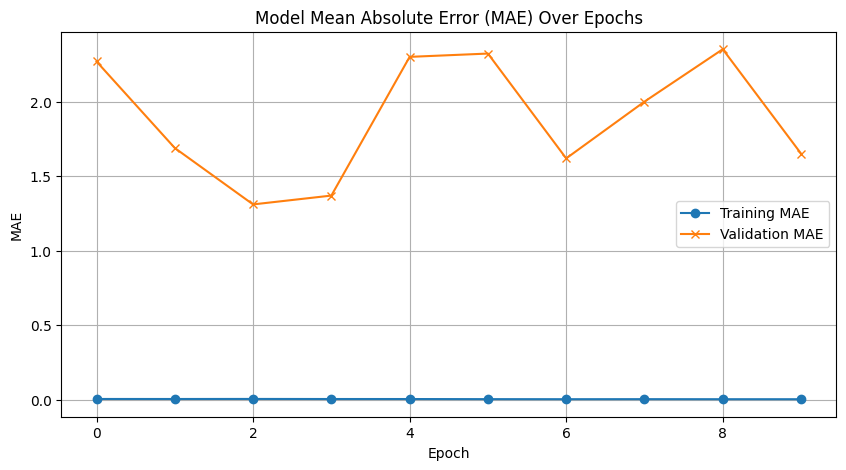

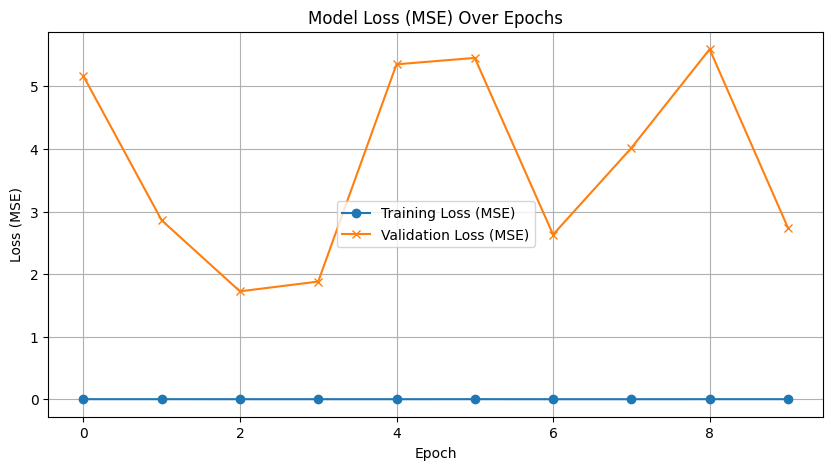

In [96]:
import matplotlib.pyplot as plt

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Training MAE', marker='o')
plt.plot(history.history['val_mae'], label='Validation MAE', marker='x')
plt.title('Model Mean Absolute Error (MAE) Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss (MSE)
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss (MSE)', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)', marker='x')
plt.title('Model Loss (MSE) Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [97]:
# Evaluate on the test data
test_loss, test_mae = model.evaluate([X_test_med, X_test_enc, X_test_num], y_test)

print(f"\nTest MAE: {test_mae:.4f}")
print(f"Test Loss (MSE): {test_loss:.4f}")


381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 12.5443 - mae: 3.5413

Test MAE: 3.5420
Test Loss (MSE): 12.5474


381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


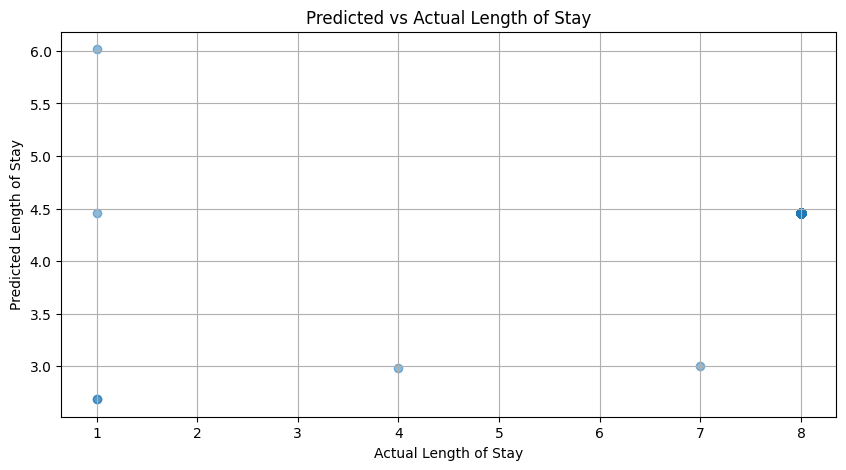

In [98]:
# Make predictions on the test set
y_pred = model.predict([X_test_med, X_test_enc, X_test_num])

# Plot predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs Actual Length of Stay')
plt.xlabel('Actual Length of Stay')
plt.ylabel('Predicted Length of Stay')
plt.grid(True)
plt.show()


In [91]:
# Fixing input dimensions based on the number of unique values
#num_medications = np.max(X_train_med) + 1
#num_encounters = np.max(X_train_enc) + 1

#print(f"Adjusted number of unique medications: {num_medications}")
#print(f"Adjusted number of unique encounter reasons: {num_encounters}")


Adjusted number of unique medications: 10
Adjusted number of unique encounter reasons: 12


# Best models were the Lasso and ElasticNet

In [71]:
import joblib

joblib.dump(best_lasso, "best_lasso_model.pkl")
joblib.dump(best_elastic, "best_elastic_model.pkl")

print("Best Lasso and ElasticNet models saved successfully!")

def ensemble_predict(X):
    lasso_pred = best_lasso.predict(X)
    elastic_pred = best_elastic.predict(X)
    ensemble_pred = (lasso_pred + elastic_pred) / 2
    return ensemble_pred

joblib.dump(ensemble_predict, "ensemble_model.pkl")
print("Ensemble model logic saved successfully!")


Best Lasso and ElasticNet models saved successfully!
Ensemble model logic saved successfully!
